In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adams-sose23/reviews.csv
/kaggle/input/adams-sose23/train.csv
/kaggle/input/adams-sose23/test.csv


# Advanced Data Analytics for Management Support - Final Assignment

## Table of Content
1. Introduction
2. Explanatory Data Analysis (EDA)
    >1. Initial exploration
    >2. Visualize each feature to understand the distinct properties they possess.
    >3. Formulation of Hypotheses: Formulate the hypothese based on the initial understanding of the   features
    >3. Find relationship: Identifying the possible relationships (e.g. dependency, co-occurence, mistakes, MSE) (*resume here)
3. Data Prerpocessing
    >1. Understand missing data
    >2. Perform data cleaning on numerical features 
    >3. Perform data cleaning & feature engineering for categorical features
    >4. Perform data cleaning on textual features
    >5. Feature Selection
4. Benchmark Model
    >1. Linear Regression
    >2. Random Forests
    
5. Models for Non-Numerical Features
    >1. Decision Tree
    >2. Random Forests
    
6. RNN Models
    

7. Applications Results and Conclusion


## 1. Introduction

This assignment is focused on forecasting property prices for Airbnb listings in London, leveraging a rich dataset comprising more than 55,000 property records. The study follows a systematic approach outlined as follows:

To begin with, we embark on a thorough data preprocessing journey. This step serves a dual purpose: understanding the intricacies of the dataset and rectifying its imperfections. We dive deep into data quality issues, identifying and addressing missing values and outliers, and ensuring the data is in a suitable format for subsequent modeling.

Next up is the Exploratory Data Analysis (EDA) phase, where we delve into the dataset to unveil its hidden gems. EDA involves deciphering relationships between variables, spotting intriguing data patterns, and uncovering connections between variables and our target outcomes. The insights gained from EDA are instrumental in crafting relevant hypotheses, pinpointing key variables, and guiding our subsequent analytical steps.

Following EDA, we proceed with some feature engineering. This process aims to boost our machine learning model's predictive power while sidestepping overfitting pitfalls. We divide the data into three distinct types – numerical, categorical, and textual – and apply tailored preprocessing techniques to each.

Last but not least, we get down to designing an array of predictive models. These models are trained on our prepared dataset, enabling us to assess their performance and identify the most effective model for our predictive task.

In a nutshell, this assignment tackles from data cleaning and exploration to feature engineering and model selection, all in the quest to predict Airbnb property prices in London.

In [794]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import re
import datetime
import time
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import spacy
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import xgboost as xgb

/kaggle/input/adams-sose23/reviews.csv
/kaggle/input/adams-sose23/train.csv
/kaggle/input/adams-sose23/test.csv


## 2. Exploratory Data Analytics (EDA)

In [891]:
# Import both the tain and test data sets from the competition's data explorer
train_data = pd.read_csv("/kaggle/input/adams-sose23/train.csv")
test_data = pd.read_csv("/kaggle/input/adams-sose23/test.csv")

Explore the features of the train_data and the test_data

In [6]:
# Now, I proceed to explore both train dataset and test dataset by respectively pulling the first 5 rows
train_data.head(n=5)

name  \
0                   Attic Room in historic Greenwich   
1                Lovely Garden Studio Private Access   
2  Comfi apartment 2 close to wimbledon tennis court   
3           Luxury room in the heart of London - SW4   
4        Excellent city Apartment with Private Patio   

                                             summary  \
0  The room does not have a door but its own disc...   
1  Garden studio with private entrance, 5 minutes...   
2                                                NaN   
3  Luxury first floor Victorian split level maiso...   
4  NEW luxury apartment, with private outside pat...   

                                               space  \
0  Double room available in historic royal Greenw...   
1  Beautiful studio with a king size bed, a sofa ...   
2                                                NaN   
3  Your room will be fully furnished, and it will...   
4  A modern, well-equipped, cosy apartment close ...   

                                         description experiences_offered  \
0  The room does not have a door but its own disc...            business   
1  Garden studio with private entrance, 5 minutes...                none   
2                                                NaN                none   
3  Luxury first floor Victorian split level maiso...                none   
4  NEW luxury apartment, with private outside pat...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Crouch End is a very hip and friendly neighbou...   
2                                                NaN   
3  Gail coffee shop, just round the corner as wel...   
4                                                NaN   

                                             transit  \
0  Parking is restricted in London. Visitors park...   
1  Walk across the street to the W3 bus stop and ...   
2                                                NaN   
3  Happy to advise on things to do in London and ...   
4                                                NaN   

                                         house_rules  \
0  no shoes on carpets no food in attic room no o...   
1  We'd love it if you would remove your shoes at...   
2  1- No party or event allowed. 2-No smoking ins...   
3  - Check-in after 18:30pm and no later than 20:...   
4  I am very happy for your visit, but please car...   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/im/pictures/20045164/7...    2167992  ...   
1  https://a0.muscache.com/im/pictures/8d1ddcdc-f...   16148175  ...   
2  https://a0.muscache.com/im/pictures/e7e4a740-d...  272000199  ...   
3  https://a0.muscache.com/im/pictures/7c2b2fcc-e...    3361233  ...   
4  https://a0.muscache.com/im/pictures/ca1494da-f...   94317022  ...   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 95.0                   10.0                      10.0   
1                 99.0                   10.0                      10.0   
2                 84.0                    9.0                       9.0   
3                  NaN                    NaN                       NaN   
4                100.0                   10.0                      10.0   

  review_scores_checkin  review_scores_communication review_scores_location  \
0                  10.0                         10.0                   10.0   
1                  10.0                         10.0                   10.0   
2                  10.0                         10.0                    9.0   
3                   NaN                          NaN                    NaN   
4                  10.0                         10.0                   10.0   

  review_scores_value          cancellation_policy reviews_per_month  \
0                10.0  strict_14_with_grace_period              2.37   
1                10.0                     moderate              2.

In [7]:
test_data.head(n=5)

name  \
0        Ladbroke Grove Stylish Portobello Apartment   
1                Contemporary Design in Notting Hill   
2                            En-suite double bedroom   
3  Double room with balcony in magnificent penthouse   
4                        The Bockery Suite 2 Chelsea   

                                             summary  \
0  Large, bright and contemporary flat located in...   
1  Stylish design on a beautiful tree lined stree...   
2  Quiet en-suite double bedroom in our lovely ho...   
3  My place is close to Aldgate . You’ll love my ...   
4  This 26m2 Suite comprises of 1 bedroom and 1 b...   

                                               space  \
0                                                NaN   
1  The (Phone number hidden by Airbnb) ) is thoug...   
2                                                NaN   
3                                                NaN   
4  Whether it's just for you or your family, whet...   

                                         description experiences_offered  \
0  Large, bright and contemporary flat located in...                none   
1  Stylish design on a beautiful tree lined stree...                none   
2  Quiet en-suite double bedroom in our lovely ho...                none   
3  My place is close to Aldgate . You’ll love my ...                none   
4  This 26m2 Suite comprises of 1 bedroom and 1 b...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Notting Hill is a trendy, artistic, bohemian n...   
2                                                NaN   
3                                                NaN   
4  When you have had your fill of relaxing in the...   

                                             transit  \
0                                                NaN   
1  There are 2 underground stations within walkin...   
2                                                NaN   
3                                                NaN   
4  Our visitors often tell us that they had no id...   

                                         house_rules  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                     - No parties, events or guests   
4  What you do in the privacy of your own room is...   

                                         picture_url   host_id  ...  \
0  https://a0.muscache.com/im/pictures/9e15bc56-a...  28086957  ...   
1  https://a0.muscache.com/im/pictures/c2ea8799-e...  16965290  ...   
2  https://a0.muscache.com/im/pictures/4b86abd0-0...   4363076  ...   
3  https://a0.muscache.com/im/pictures/23ea2939-6...   7603738  ...   
4  https://a0.muscache.com/im/pictures/64910777/2...  26586101  ...   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 96.0                   10.0                      10.0   
1                 97.0                   10.0                      10.0   
2                  NaN                    NaN                       NaN   
3                  NaN                    NaN                       NaN   
4                 98.0                   10.0                      10.0   

  review_scores_checkin  review_scores_communication review_scores_location  \
0                  10.0                         10.0                   10.0   
1                  10.0                         10.0                   10.0   
2                   NaN                          NaN                    NaN   
3                   NaN                          NaN                    NaN   
4                  10.0                         10.0                   10.0   

  review_scores_value cancellation_policy reviews_per_month  listing_id  
0                10.0            flexible              1.89  0FEMC4VA5U  
1                10.0            flexible              2.50  PQ2BYEO

In [8]:
train_data.tail(n=10)

name  \
55274        LONDON MANFORD 1 BED APARTMENT: SLEEPS 2-6.   
55275                                       Sunny studio   
55276         Large Boutique Double Room Near Shoreditch   
55277                                     THE PARK COURT   
55278                                          Spa Green   
55279     Brixton/Camberwell DBL bedroom, brand new flat   
55280  End suite with private bathroom. Close to the ...   
55281                   The place full of a good energy!   
55282  Amazing 1BD apartment right next to Finsbury Park   
55283                   Serene Private Room with Ensuite   

                                                 summary  \
55274  1.  The   apartment is  available and it is  i...   
55275  Bright and sunny studio apartment with just 8m...   
55276  Large Double Room in a second floor flat close...   
55277  We are delighted to present this Two Bedroom B...   
55278  Hey, We're a couple in central London and this...   
55279  Large private double bedroom available in a br...   
55280                                                NaN   
55281  3 double bedroom APARTMENT for families and fr...   
55282  This amazing 1 bed apartment offers an ideal b...   
55283  This spacious bedroom with its beautiful ensui...   

                                                   space  \
55274                                                NaN   
55275                                                NaN   
55276                                                NaN   
55277                                                NaN   
55278                                                NaN   
55279                                                NaN   
55280  Private end suite with smart TV and PlayStatio...   
55281  Warm, clean and safe, close to city atractions...   
55282  Welcome to this modern and bright apartment in...   
55283  This beautiful bedroom has recently been refur...   

                                             description experiences_offered  \
55274  1.  The   apartment is  available and it is  i...                none   
55275  Bright and sunny studio apartment with just 8m...                none   
55276  Large Double Room in a second floor flat close...                none   
55277  We are delighted to present this Two Bedroom B...                none   
55278  Hey, We're a couple in central London and this...                none   
55279  Large private double bedroom available in a br...                none   
55280  Private end suite with smart TV and PlayStatio...                none   
55281  3 double bedroom APARTMENT for families and fr...                none   
55282  This amazing 1 bed apartment offers an ideal b...                none   
55283  This spacious bedroom with its beautiful ensui...                none   

                                   neighborhood_overview  \
55274                                                NaN   
55275                                                NaN   
55276  Quite and very safe. Close to a Tesco and Sain...   
55277                                                NaN   
55278                                                NaN   
55279  Situated smack bang in the centre of south Lon...   
55280                                                NaN   
55281  Location, location, location: Local amenities:...   
55282                                                NaN   
55283  Chiswick is a beautiful neighbourhood full of ...   

                                                 transit  \
55274                                                NaN   
55275                                                NaN   
55276                                                NaN   
55277  Easy access to Oxford Street and central Londo...   
55278                                                NaN   
55279  Loughbrough Junction Station (Thameslink Line)...   
55280                                                NaN   
55281  Direct, convenient and quick 20 mins acc

In [9]:
# After having a look into both datasets, I attempt to understand the differences of their respective columns
train_data.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'picture_url',
       'host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'listing_id'],
      dtype='object')

In [10]:
# As a reuslt, I conclude that the features of the train data and the test_data are identical except the train_data has an addtional feature "price" which is the target feature
test_data.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'picture_url',
       'host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'listing_id'],
      dtype='object')

In [11]:
train_data.shape

(55284, 42)

In [12]:
test_data.shape #again, this validates that only column that the test_data does not contain is the "Price" column

(29769, 41)

In [13]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55284 entries, 0 to 55283
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         55270 non-null  object 
 1   summary                      52330 non-null  object 
 2   space                        38403 non-null  object 
 3   description                  53558 non-null  object 
 4   experiences_offered          55284 non-null  object 
 5   neighborhood_overview        35778 non-null  object 
 6   transit                      35477 non-null  object 
 7   house_rules                  31906 non-null  object 
 8   picture_url                  55284 non-null  object 
 9   host_id                      55284 non-null  int64  
 10  host_since                   55173 non-null  object 
 11  host_response_time           37482 non-null  object 
 12  host_response_rate           37482 non-null  object 
 13  host_is_superhos

### 2.B. Visualize each feature to understand the distinct properties they possess
>In the following section, I explore and visualize individual feature's properties to familiarize with the data. I adopt an automated data analysis package "SweetViz" to generate such reports. 

In [14]:
train_data.longitude
#these are not a normalized values 

0       -0.01062
1       -0.12416
2       -0.18567
3       -0.14137
4       -0.11219
          ...   
55279   -0.10048
55280   -0.00913
55281   -0.14177
55282   -0.10193
55283   -0.26685
Name: longitude, Length: 55284, dtype: float64

<Axes: >

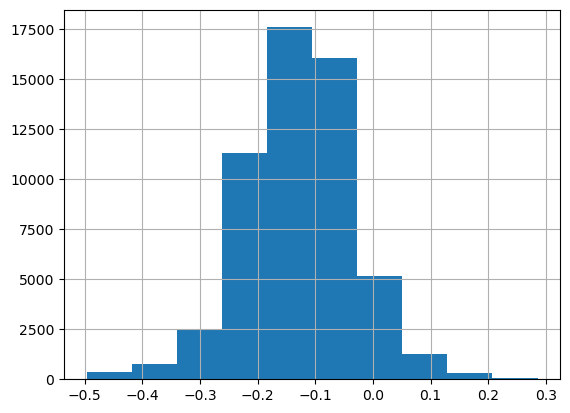

In [15]:
train_data.longitude.hist()
# we can conclude that the houses center around the center of the city --> we hypothesize that the housing prices are pricier there

In [16]:
train_data.longitude.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
55279    False
55280    False
55281    False
55282    False
55283    False
Name: longitude, Length: 55284, dtype: bool

In [17]:
sum(train_data.longitude.isna())

0

In [18]:
train_data.latitude

0        51.47457
1        51.58329
2        51.41634
3        51.45622
4        51.48114
           ...   
55279    51.47078
55280    51.53341
55281    51.57463
55282    51.56586
55283    51.48549
Name: latitude, Length: 55284, dtype: float64

<Axes: >

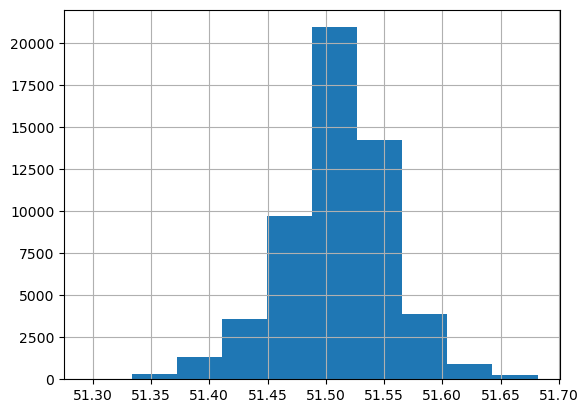

In [19]:
train_data.latitude.hist()

In [20]:
sum(train_data.latitude.isna())

0

In [21]:
y = train_data['price']
y

0         35.0
1         75.0
2        120.0
3         50.0
4        104.0
         ...  
55279     65.0
55280     40.0
55281     89.0
55282     80.0
55283    110.0
Name: price, Length: 55284, dtype: float64

In [22]:
X = train_data[['longitude']]
X
#add more columns later depending on the performance of the model
#try to decrease the means-square error

longitude
0       -0.01062
1       -0.12416
2       -0.18567
3       -0.14137
4       -0.11219
...          ...
55279   -0.10048
55280   -0.00913
55281   -0.14177
55282   -0.10193
55283   -0.26685

[55284 rows x 1 columns]

In [23]:
train_data.accommodates

0        2
1        2
2        5
3        1
4        3
        ..
55279    2
55280    2
55281    7
55282    2
55283    2
Name: accommodates, Length: 55284, dtype: int64

In [24]:
train_data.beds

0        1.0
1        1.0
2        2.0
3        1.0
4        2.0
        ... 
55279    1.0
55280    0.0
55281    4.0
55282    1.0
55283    1.0
Name: beds, Length: 55284, dtype: float64

In [25]:
train_data.bedrooms

0        1.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
55279    1.0
55280    1.0
55281    3.0
55282    1.0
55283    1.0
Name: bedrooms, Length: 55284, dtype: float64

In [26]:
train_data.bathrooms

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
55279    1.0
55280    1.0
55281    2.0
55282    1.0
55283    1.0
Name: bathrooms, Length: 55284, dtype: float64

In [27]:
train_data.guests_included

0        1
1        2
2        2
3        1
4        1
        ..
55279    1
55280    1
55281    2
55282    2
55283    1
Name: guests_included, Length: 55284, dtype: int64

In [28]:
train_data.host_total_listings_count

0        1.0
1        1.0
2        2.0
3        1.0
4        2.0
        ... 
55279    2.0
55280    1.0
55281    4.0
55282    1.0
55283    2.0
Name: host_total_listings_count, Length: 55284, dtype: float64

In [29]:
sum(train_data.host_total_listings_count.isna())

111

In [30]:
train_data.host_total_listings_count.describe()

count    55173.000000
mean        20.704475
std        117.029690
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1321.000000
Name: host_total_listings_count, dtype: float64

<Axes: >

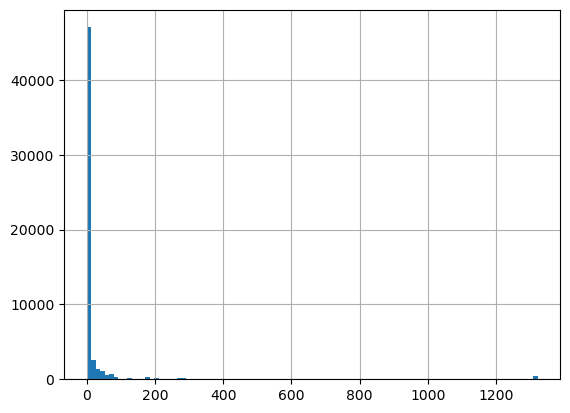

In [31]:
train_data.host_total_listings_count.hist(bins=100) #Due to the extreme outlier, we shouldnt be using the mean but the median for NaN values

In [32]:
train_data.host_total_listings_count.median()

2.0

In [33]:
train_data.describe(include='all')

name                                            summary  \
count         55270                                              52330   
unique        54042                                              49111   
top     Double room  Featured in The New York Times, The Wall Stree...   
freq             28                                                125   
mean            NaN                                                NaN   
std             NaN                                                NaN   
min             NaN                                                NaN   
25%             NaN                                                NaN   
50%             NaN                                                NaN   
75%             NaN                                                NaN   
max             NaN                                                NaN   

                                                    space  \
count                                               38403   
unique                                              35719   
top     Situated in an excellent central location. Tow...   
freq                                                   20   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                               53558               55284   
unique                                              51626                   5   
top     My Luxury Two Bedroom apartment is located min...                none   
freq                                                   17               54222   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                                    neighborhood_overview  \
count                                               35778   
unique                                              30233   
top     Conveniently located in Maida Vale one of Lond...   
freq                                                   40   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                  transit  \
count                                               35477   
unique                                              31098   
top     Transport links are excellent with convenient ...   
freq                                                   47   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max             

In [34]:
test_data.describe(include='all')

name  \
count                                               29759   
unique                                              29266   
top     Centrally Located Tower Hill/Aldagte East Studios   
freq                                                   12   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                  summary  \
count                                               28192   
unique                                              26940   
top     Featured in The New York Times, The Wall Stree...   
freq                                                   62   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    space description  \
count                                               20712       28826   
unique                                              19781       28136   
top     There is an en-suite bathroom which is a pleas...           .   
freq                                                   15          13   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

       experiences_offered                              neighborhood_overview  \
count                29769                                              19218   
unique                   5                                              17032   
top                   none  East London is a lively and unique area with p...   
freq                 29194                                                 23   
mean                   NaN                                                NaN   
std                    NaN                                                NaN   
min                    NaN                                                NaN   
25%                    NaN                                                NaN   
50%                    NaN                                                NaN   
75%                    NaN                                                NaN   
max                    NaN                                                NaN   

                                                  transit  \
count                                               19097   
unique                                              17379   
top     Transport links are excellent with convenient ...   
freq                                                   27   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

    

In [35]:
train_data.experiences_offered.value_counts()

none        54222
business      364
family        300
social        266
romantic      132
Name: experiences_offered, dtype: int64

In [36]:
train_data.cancellation_policy.value_counts()

strict_14_with_grace_period    24102
flexible                       17094
moderate                       13643
super_strict_60                  230
super_strict_30                  211
strict                             2
luxury_moderate                    1
luxury_super_strict_95             1
Name: cancellation_policy, dtype: int64

## Visualizing missing data
Reference: https://www.kaggle.com/code/dcstang/interactive-exploratory-data-analysis-eda

## Missingo
First of all, I employ the library missingo which displays a null/NaN value in the data as a white block. In other words, the messier the data is the more likely you will see white patches and blocks in the data. 

In [37]:
from ipywidgets import widgets
import missingno

<Axes: >

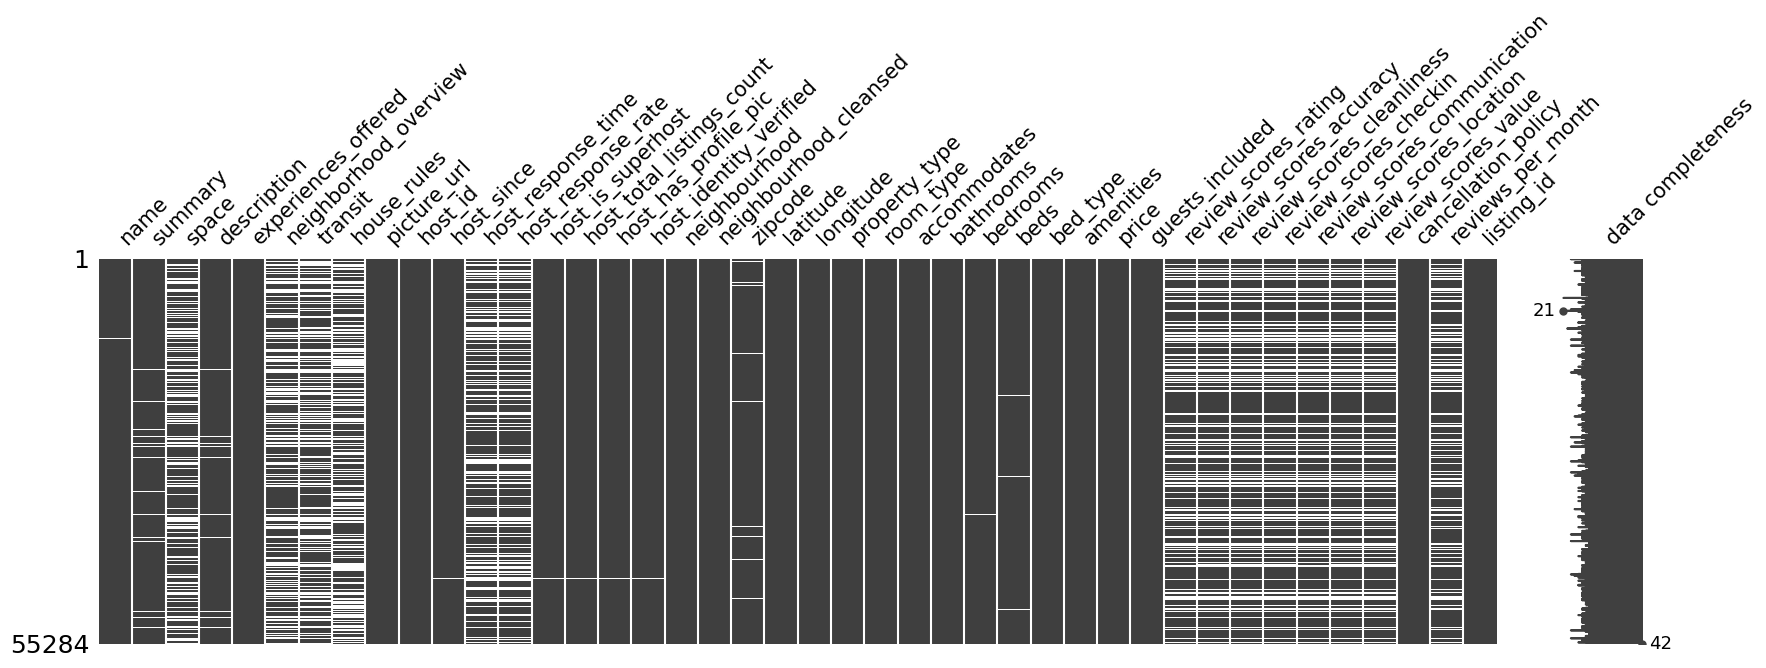

In [38]:
missingno.matrix(train_data, figsize=(20,5), labels=True, fontsize=15)

## SweetViz
Addtionally, I also employ the library SweetViz to analyze and compare the visualized train_data and test_data, creating correlation/association analyses. 


In [39]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.8 MB/s eta 0:00:0000:0100:01


In [40]:
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

                                             |          | [  0%]   00:00 -> (? left)


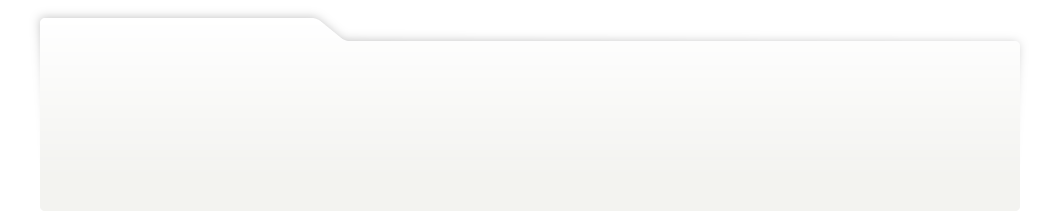
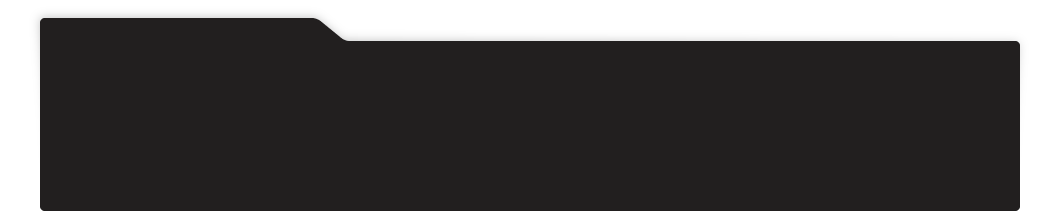
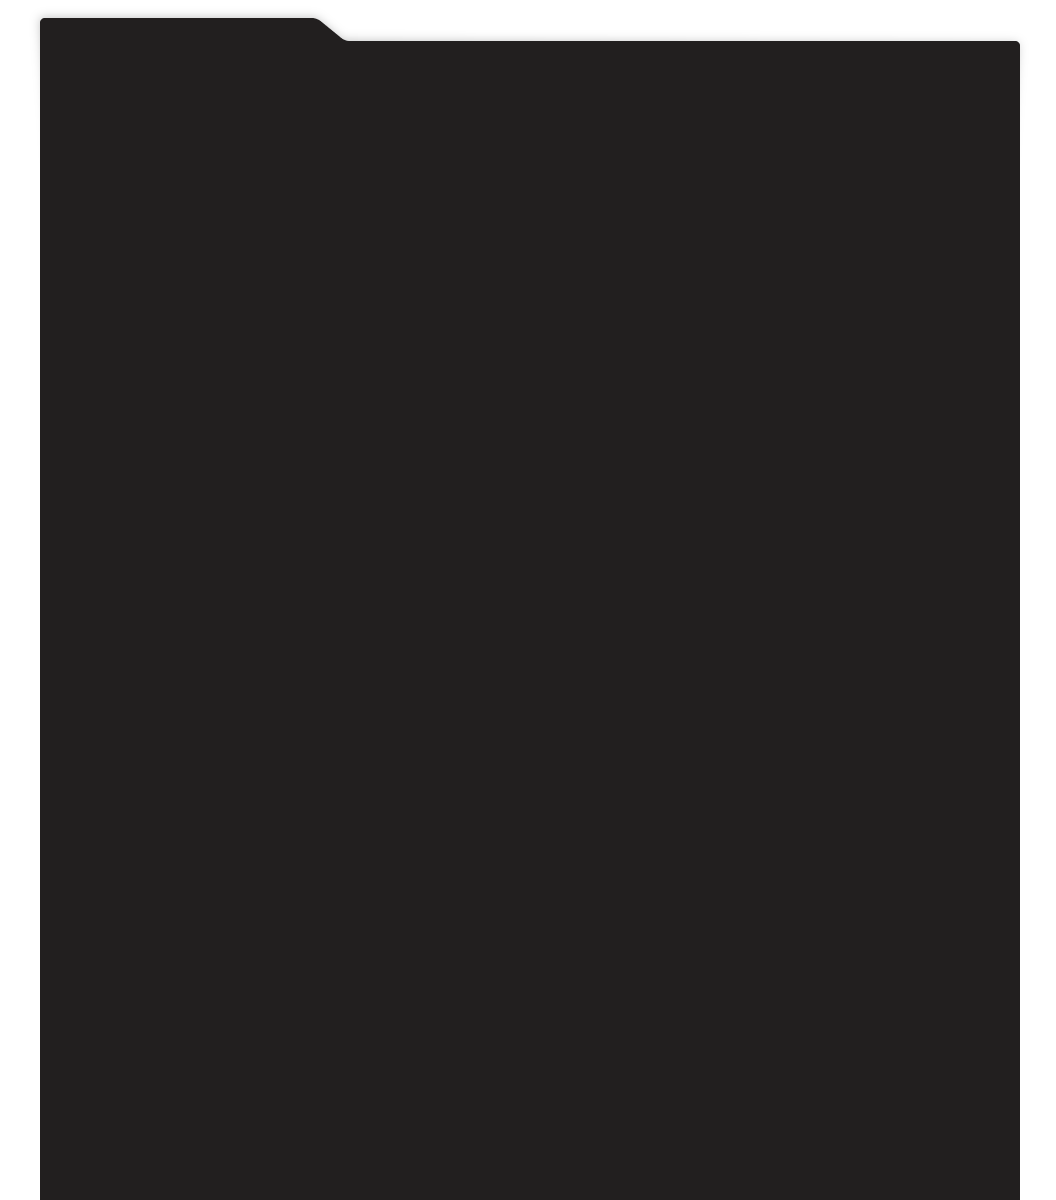
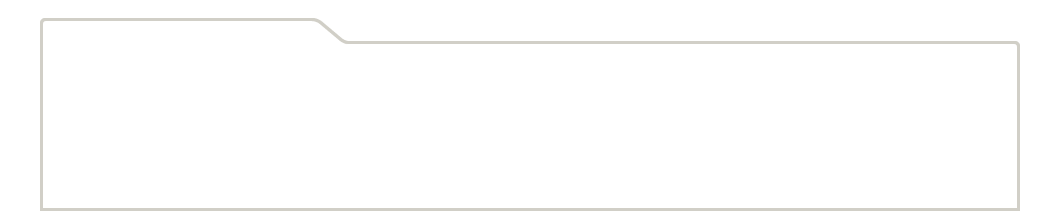
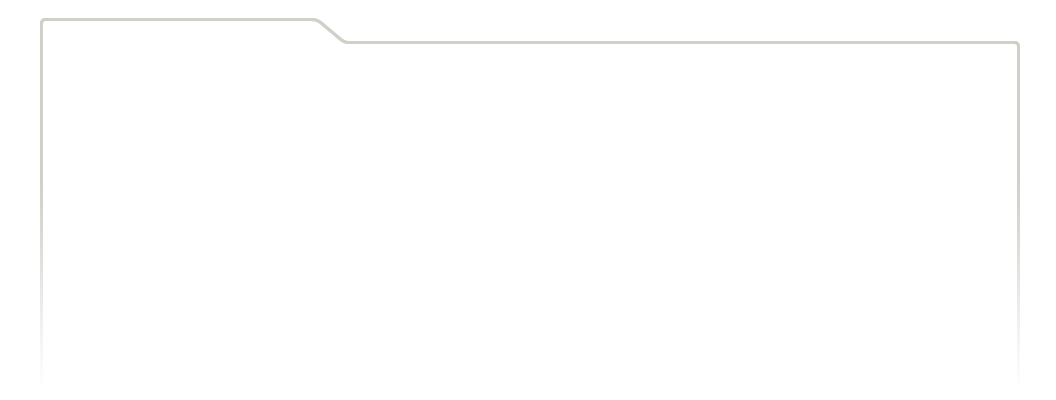
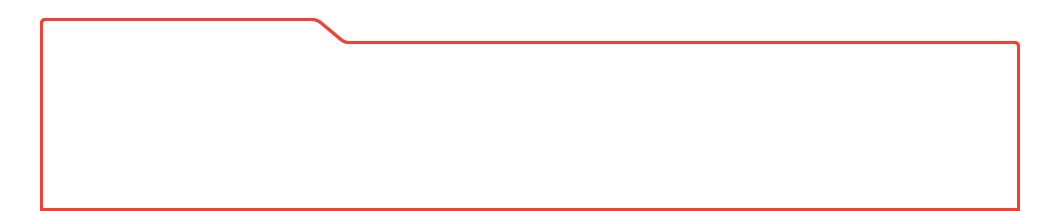
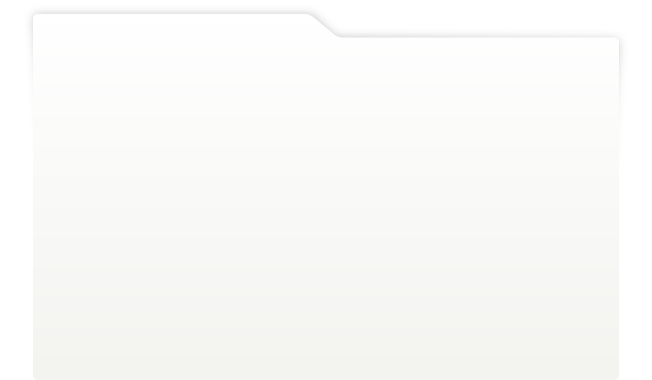
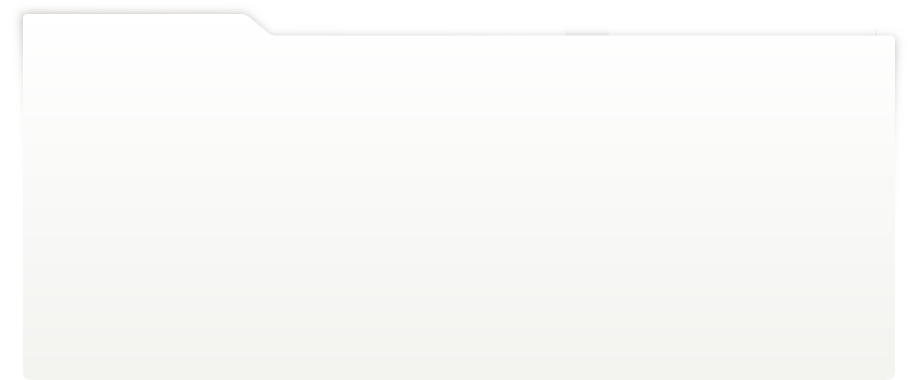
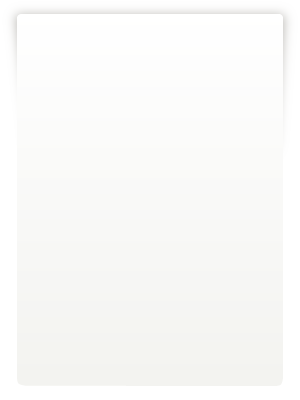
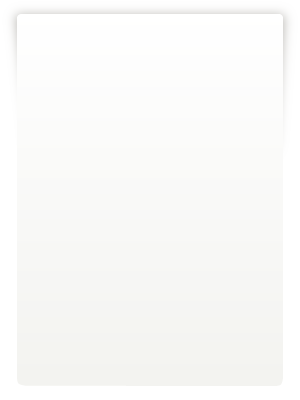
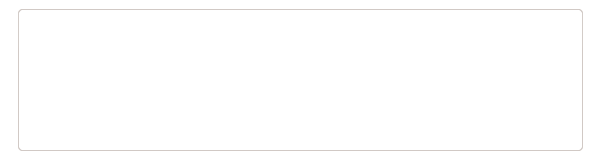
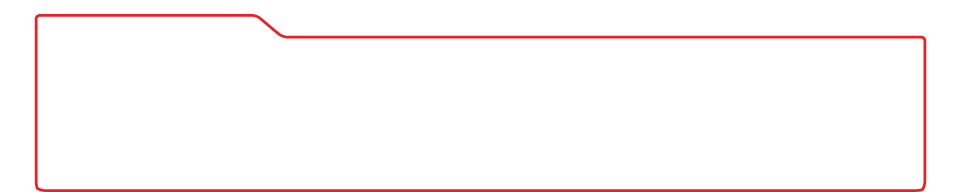
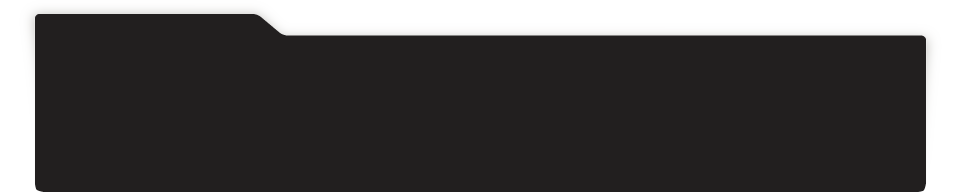
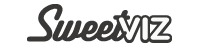
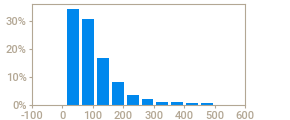
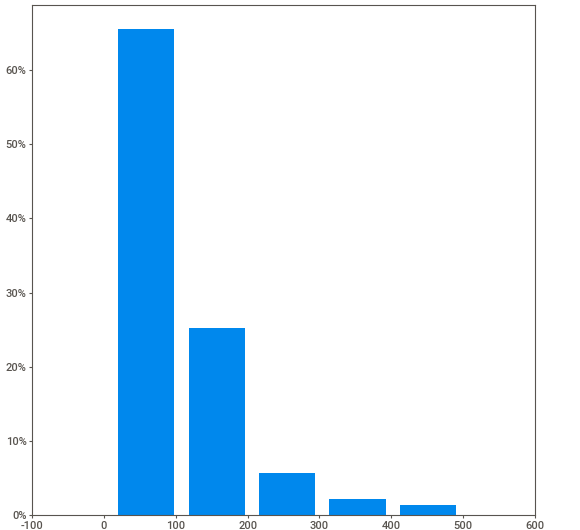
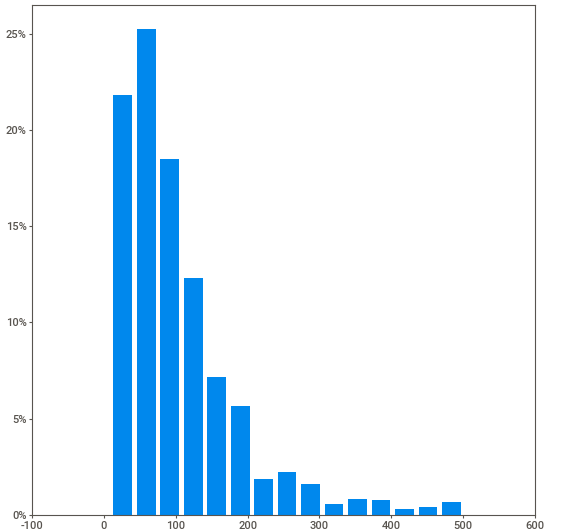
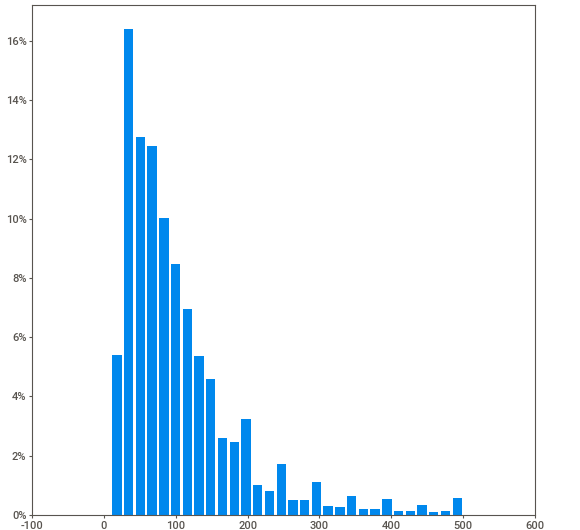
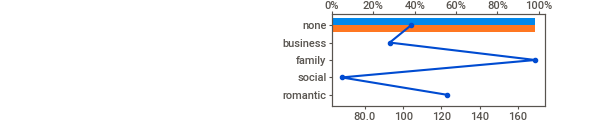
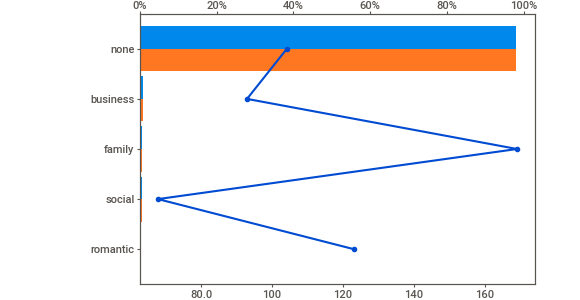
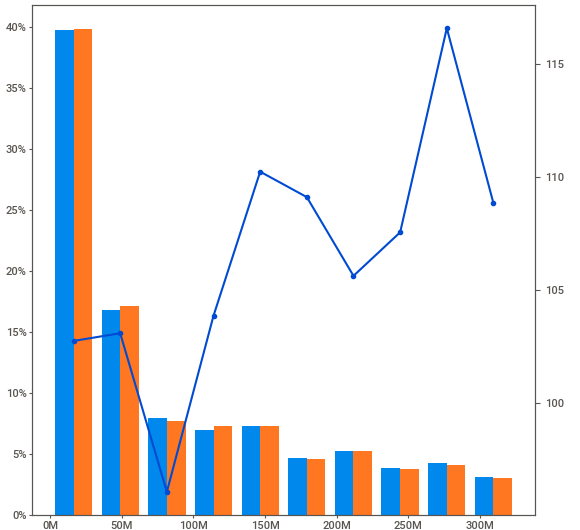
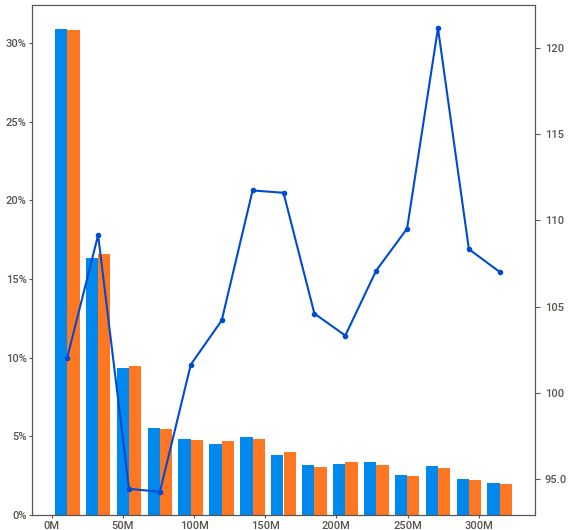
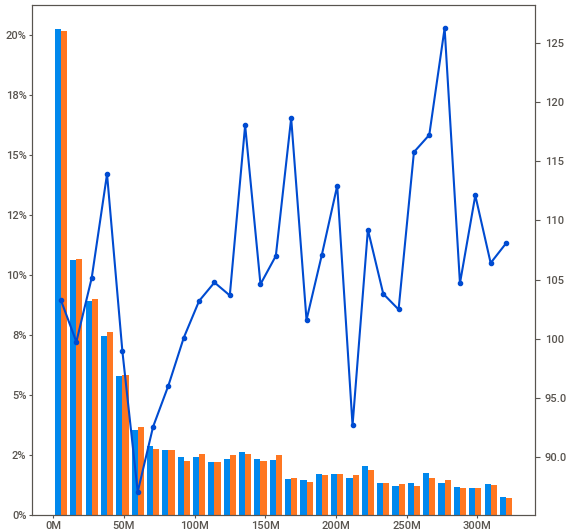
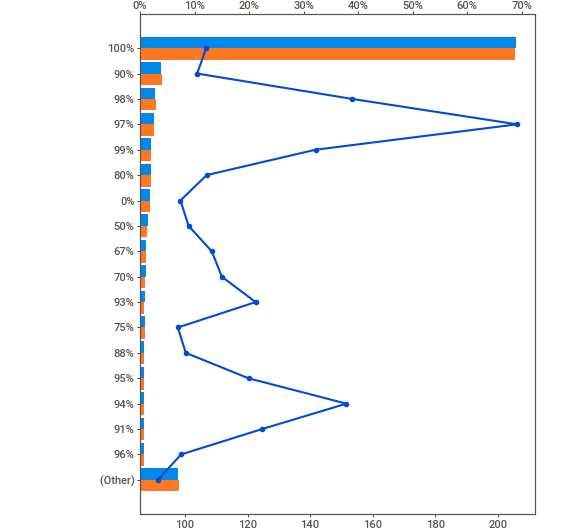
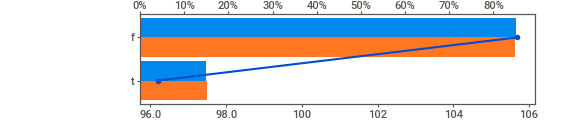
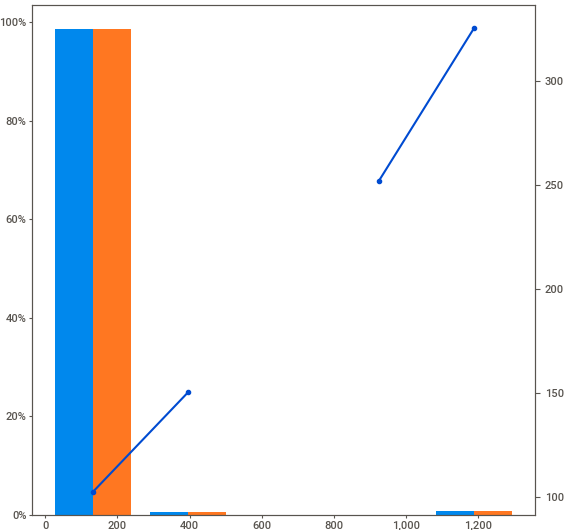
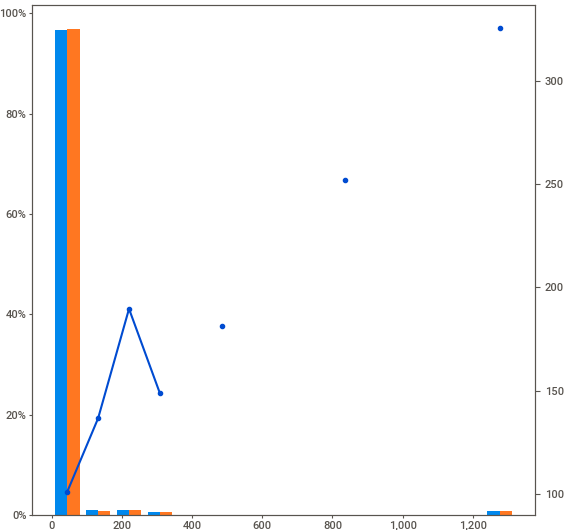
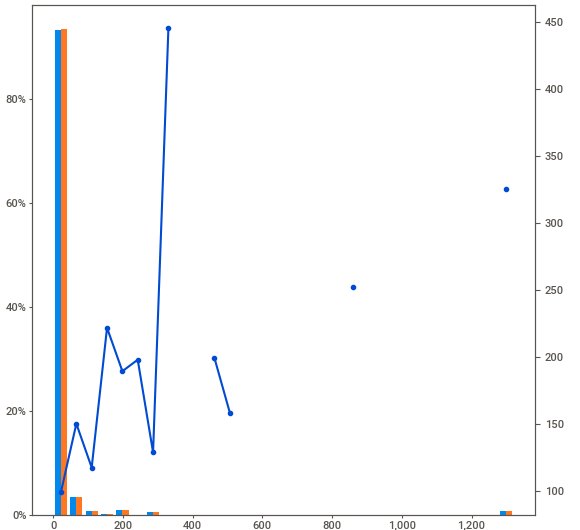
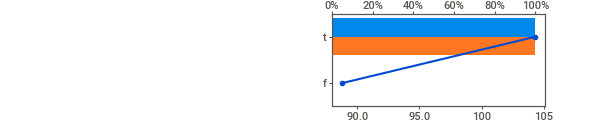
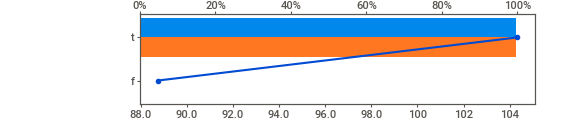
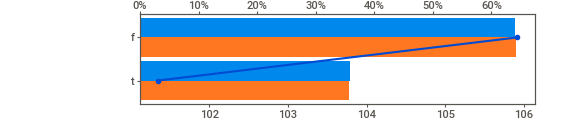
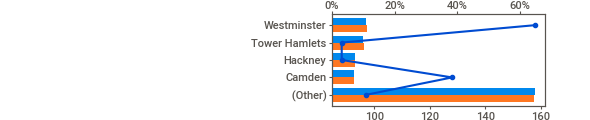
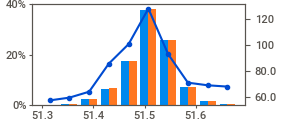
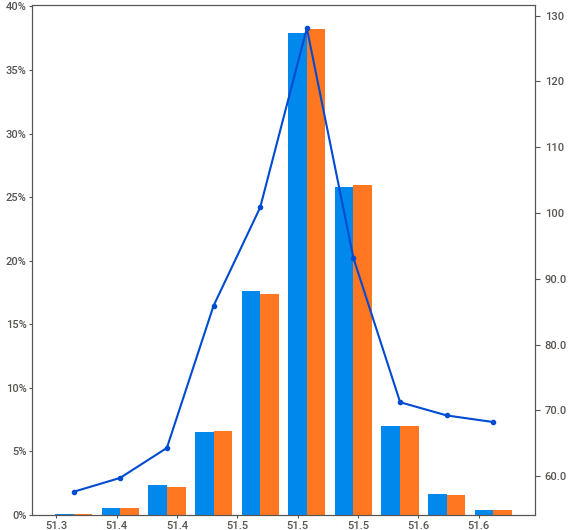
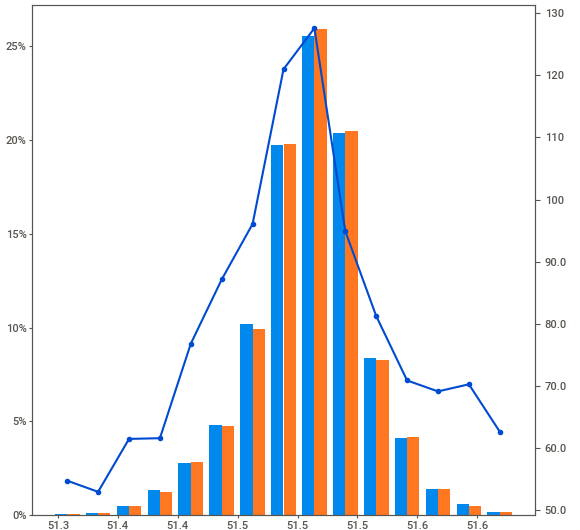
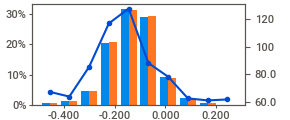
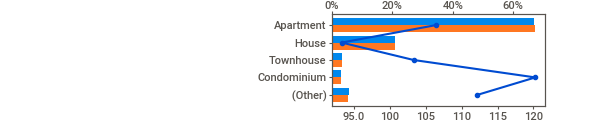
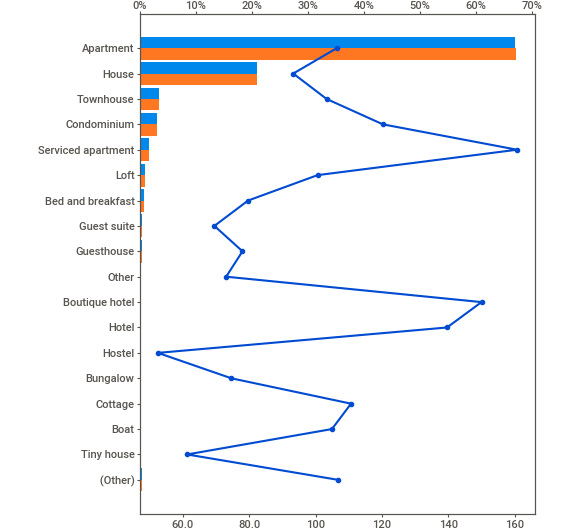
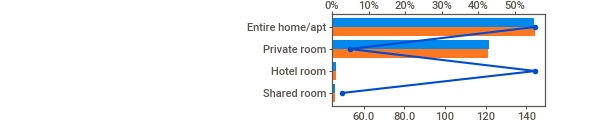
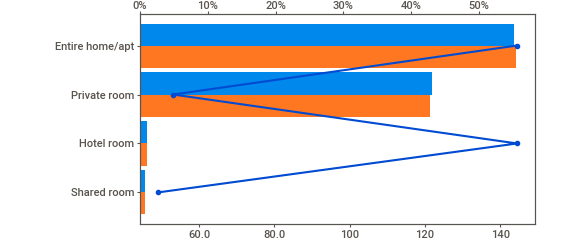
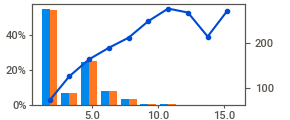
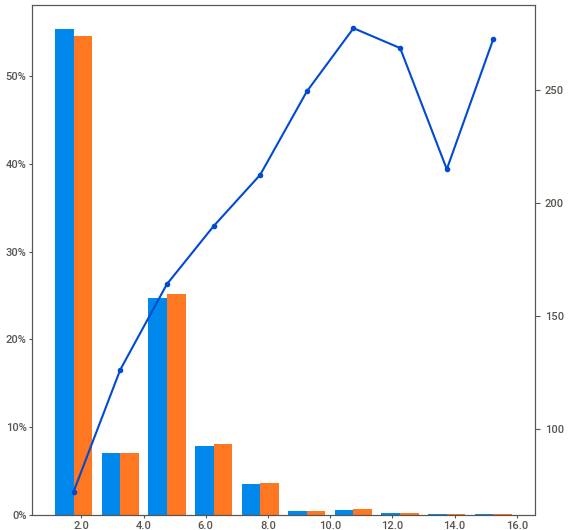
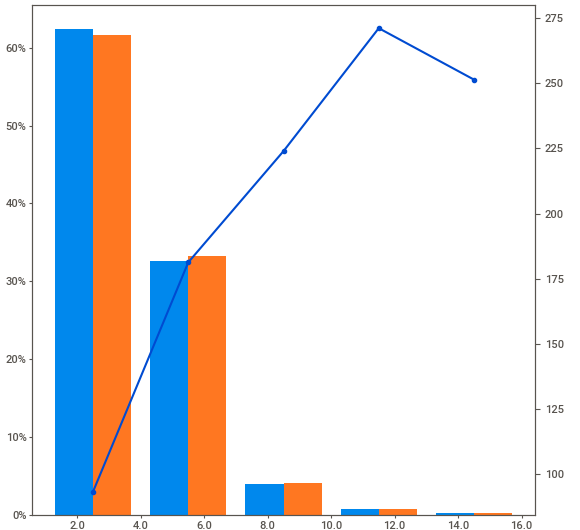
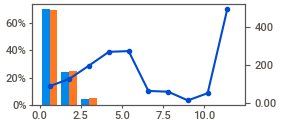
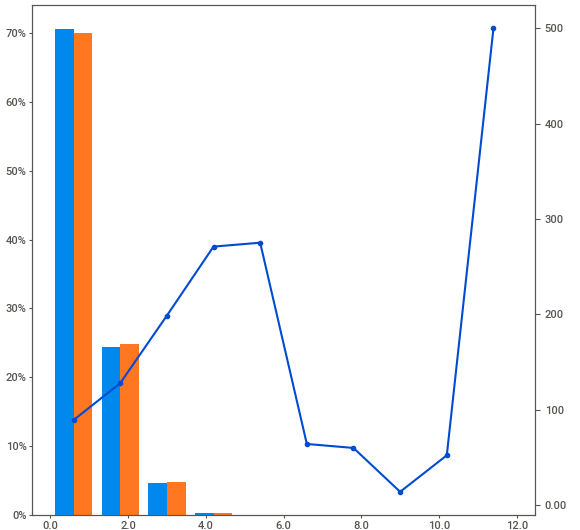
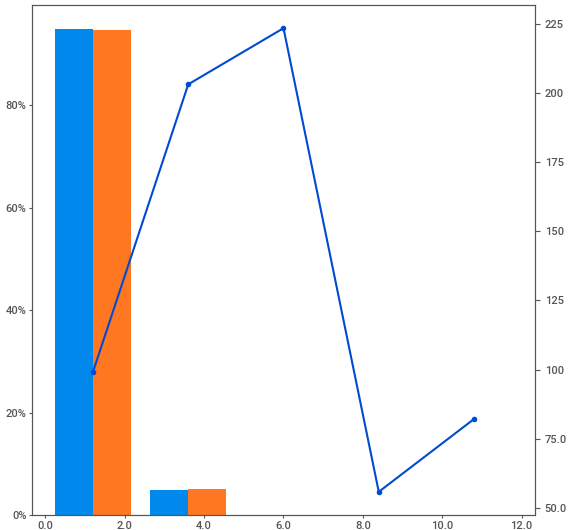
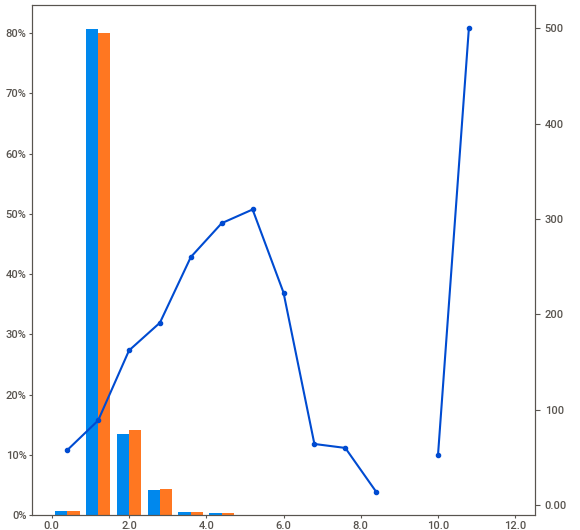
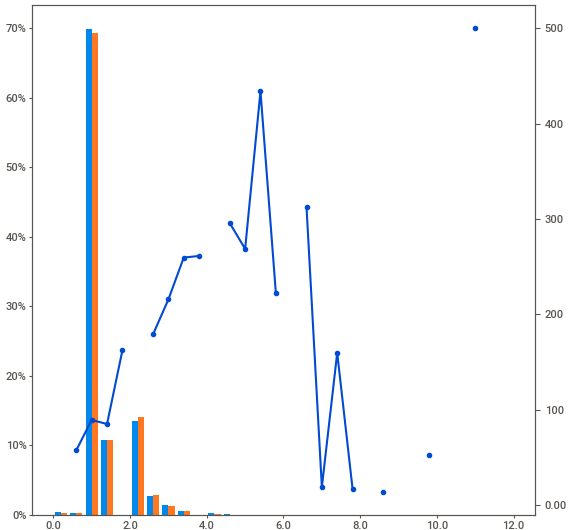
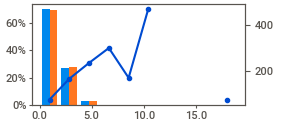
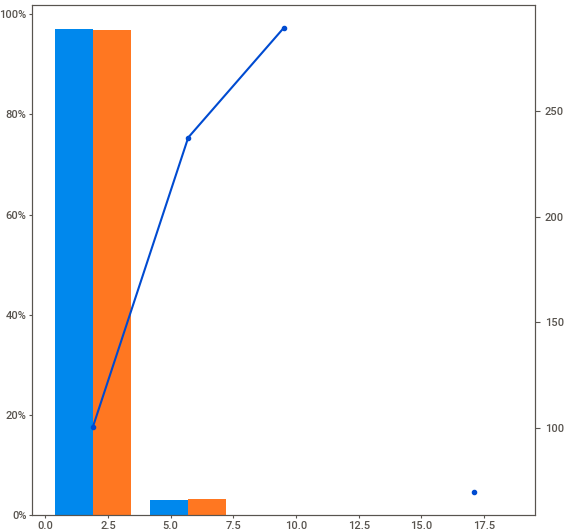
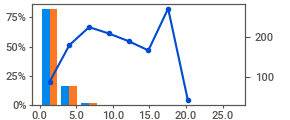
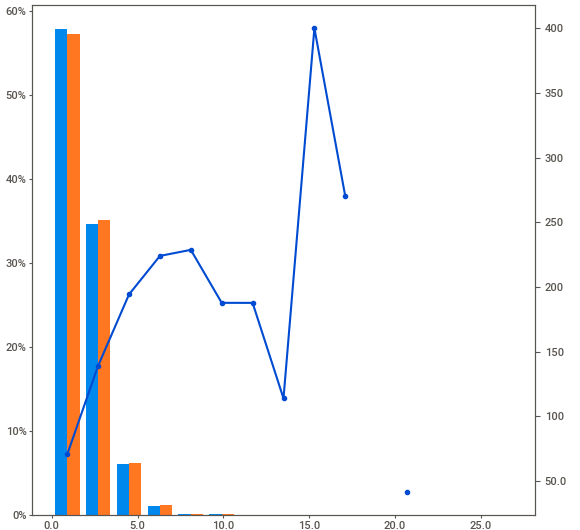
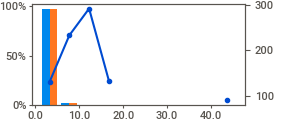
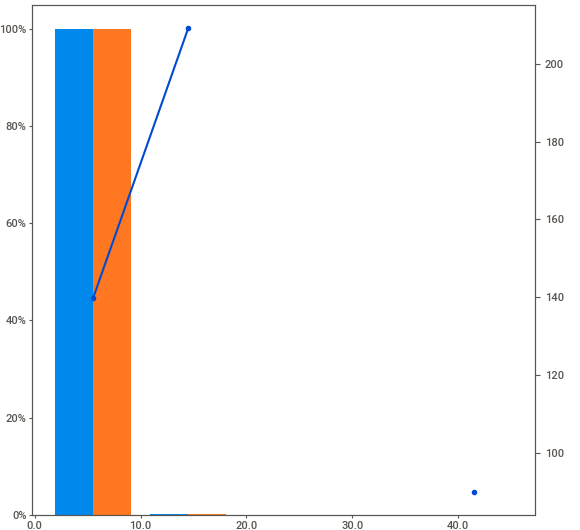
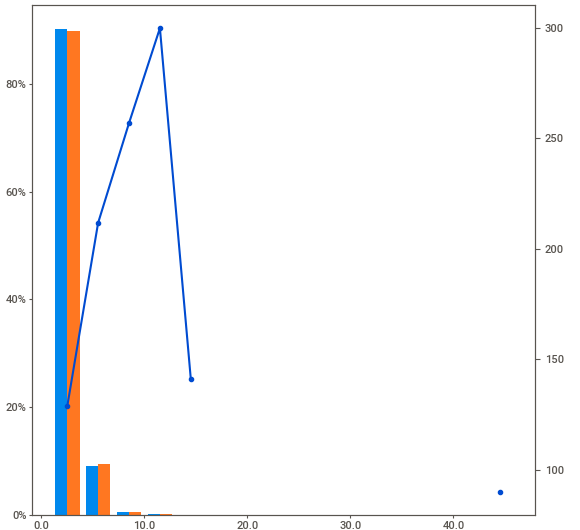
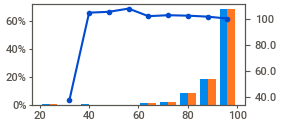
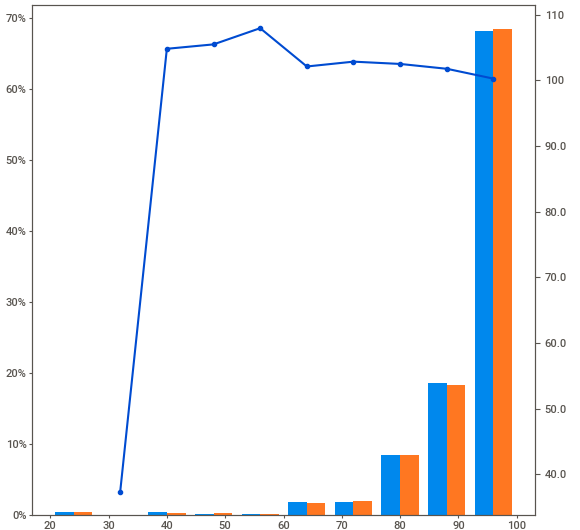
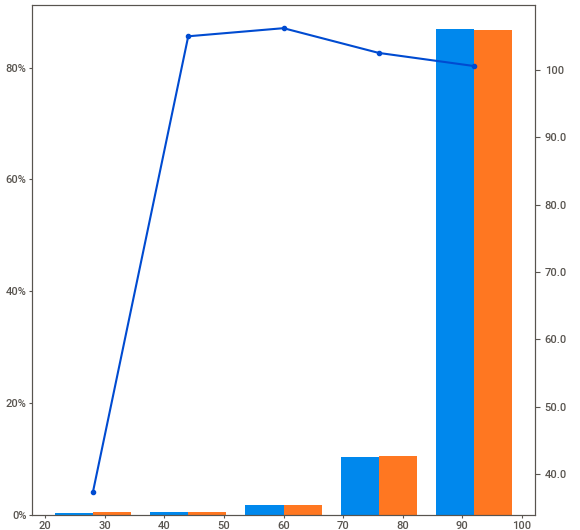
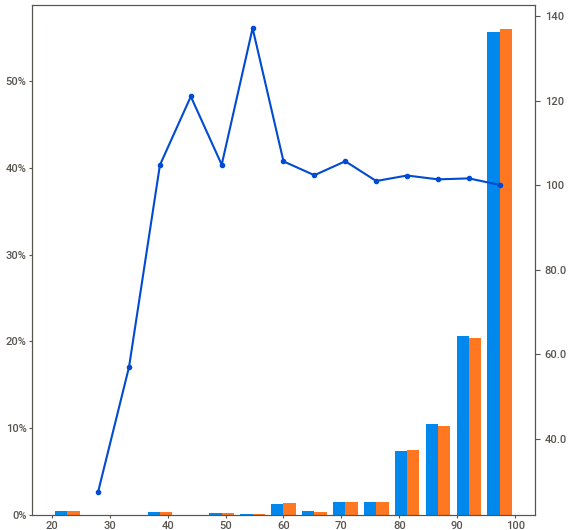
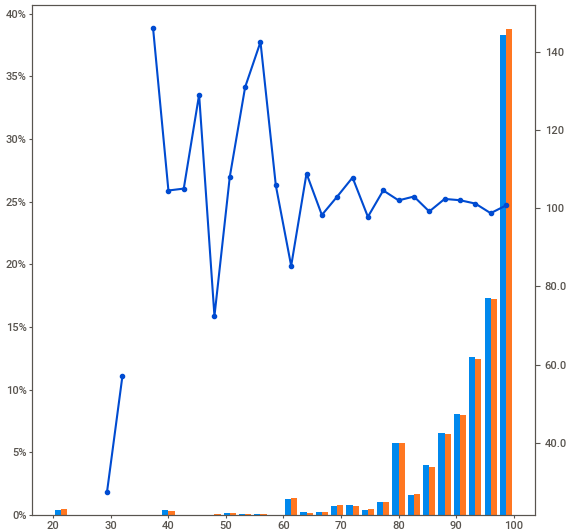
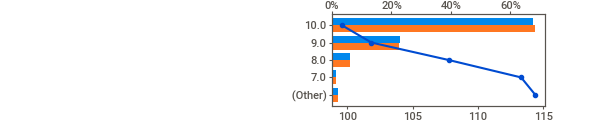
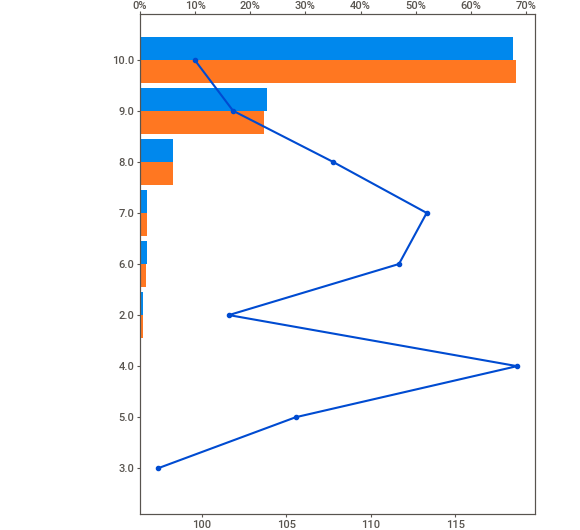
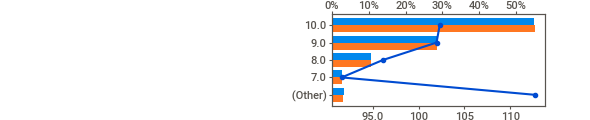
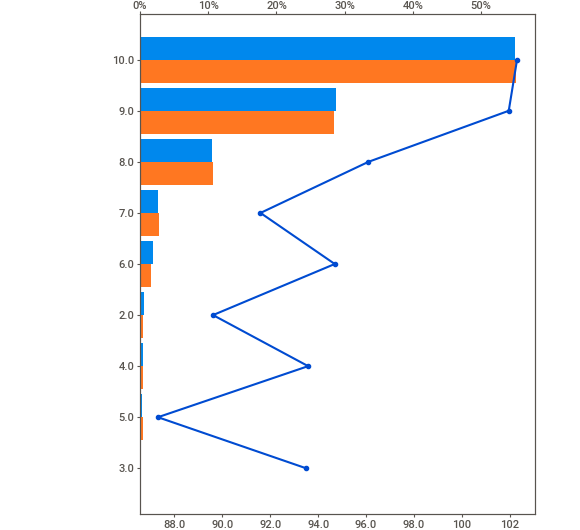
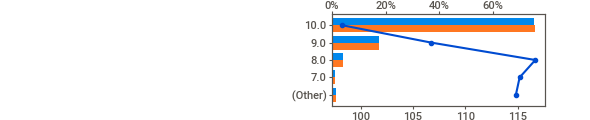
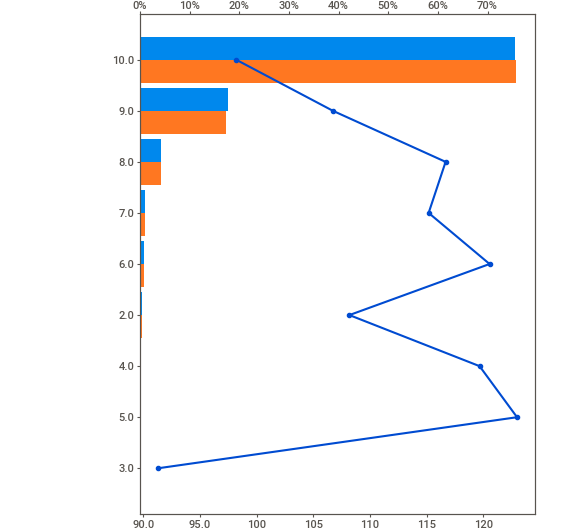
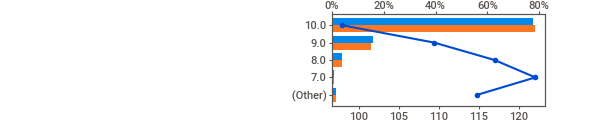
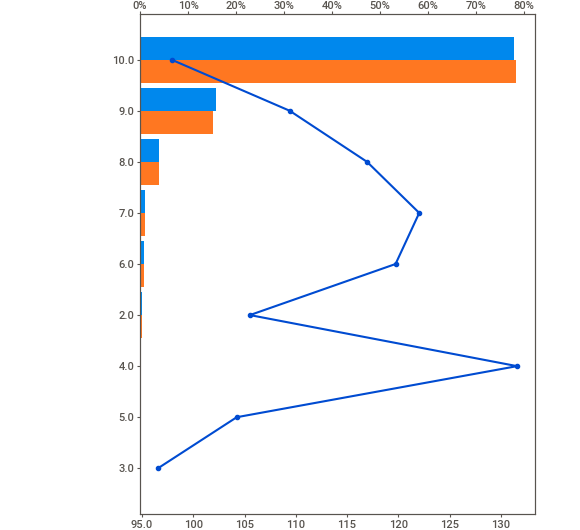
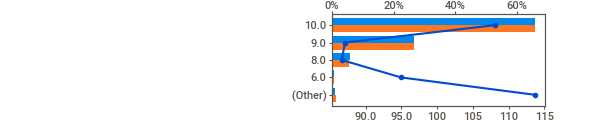
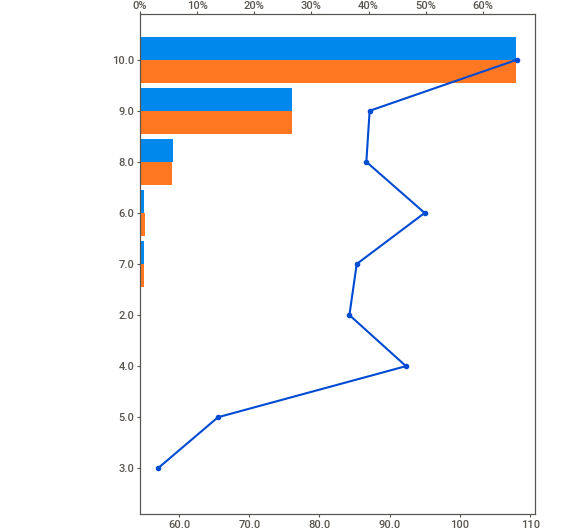
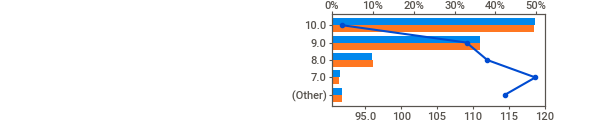
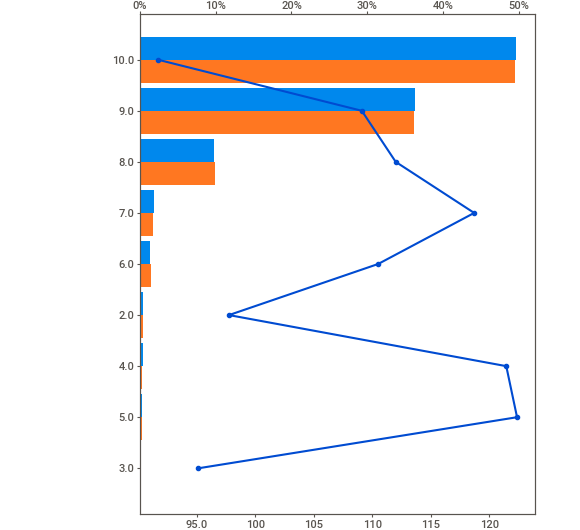
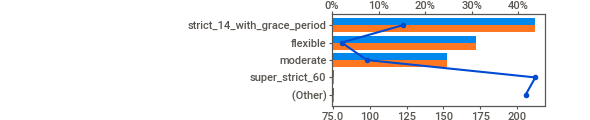
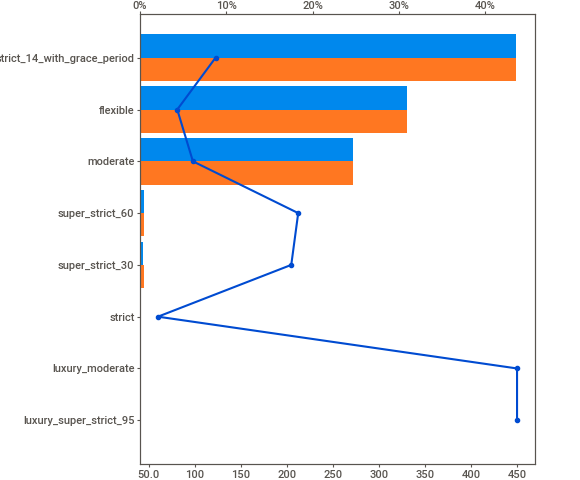
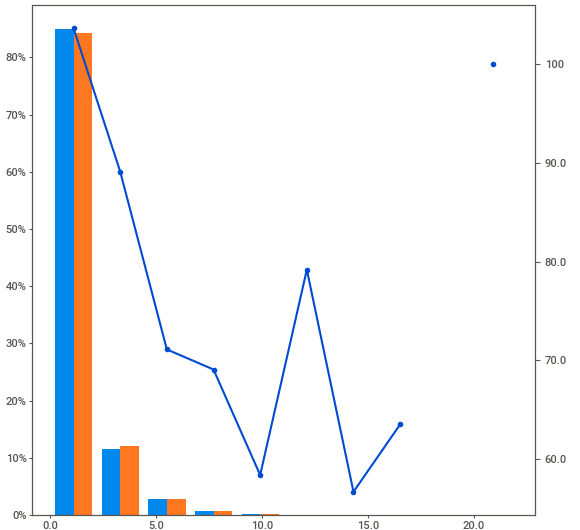
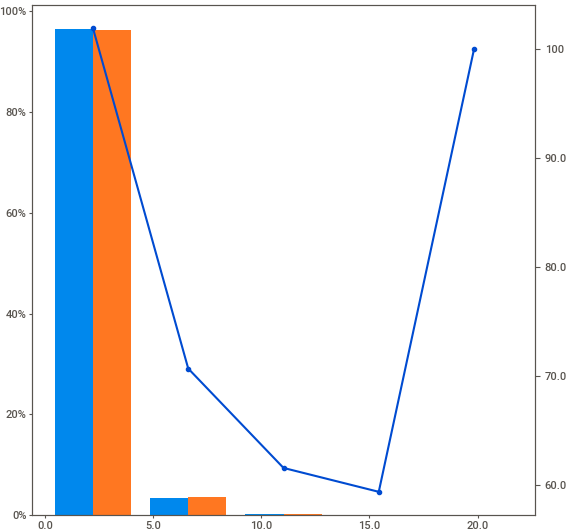
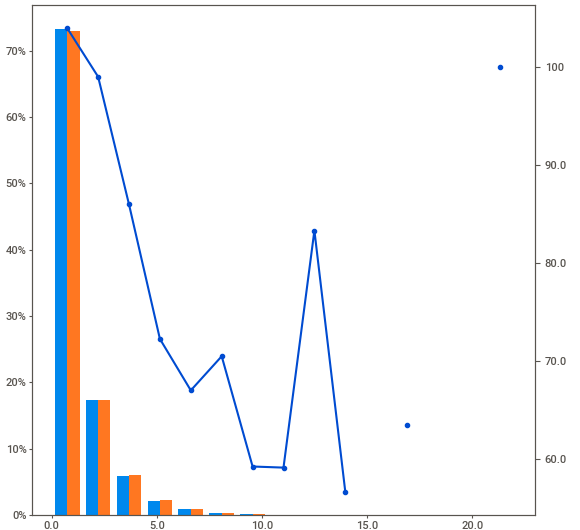
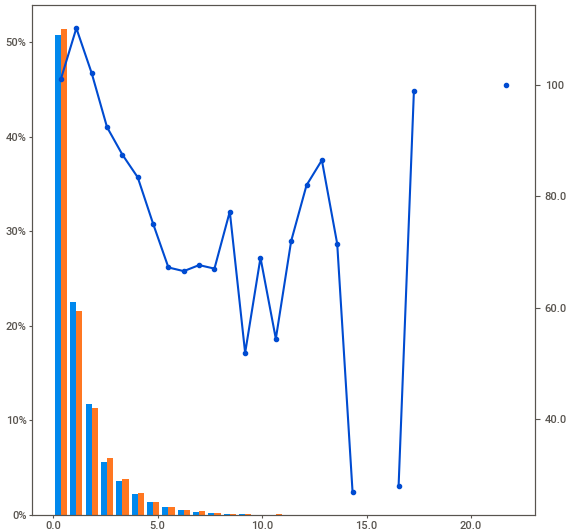
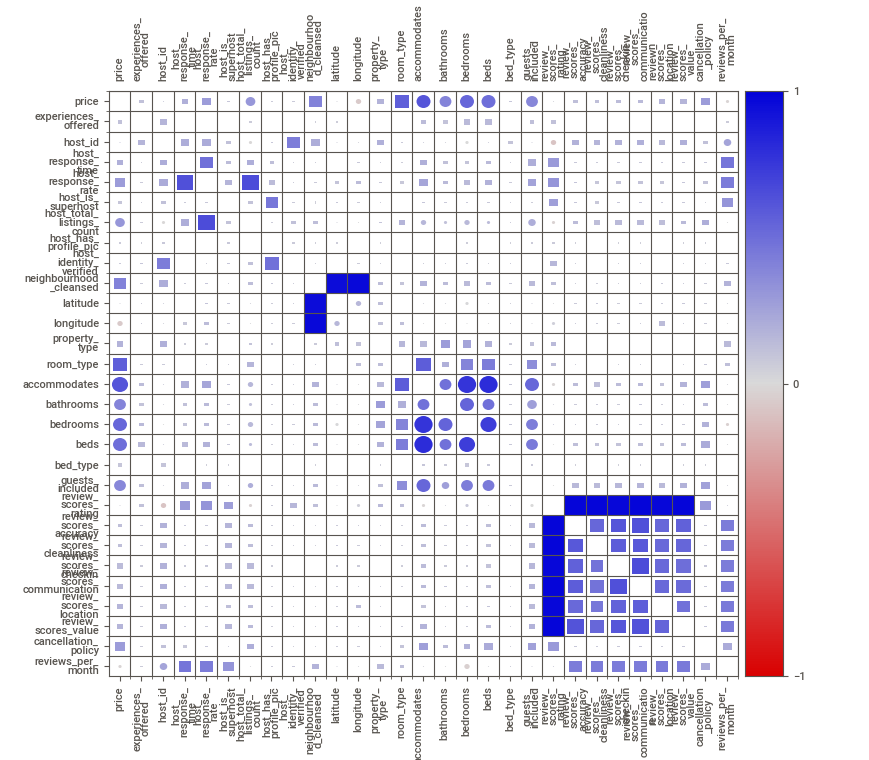
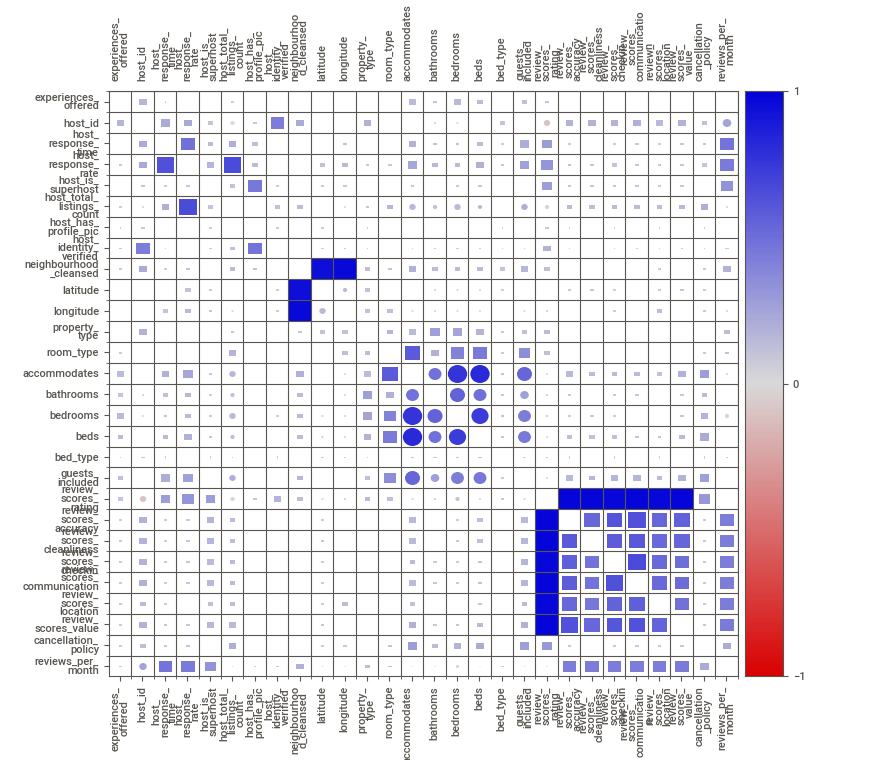

In [41]:
train_report = sv.compare([train_data, 'Train set'], [test_data, 'Test set'], target_feat='price', pairwise_analysis="on")
train_report.show_notebook(w='100%', h='full')

1. First finding: Features that are redundant could be removed or merged. E.g. I will remove longitude and latitude as they are identical to neighbourhood_cleansed and also transform the 7 review-related features (textual) into one feature called "review score" (categorical)
2. Second Finding: Features that are important to the target feature (price) are: 
    > important textual features: room_type, neighbourhood_cleansed, host_response_rate, cancellation_policy
    
    > important nummerical features: accommodates, bedrooms, beds, bathrooms, guests_included, host_total_listings_count
3. Third finding: Identify features with high missing value
    > house_rules 42%
    
    > transit 36%
    
    > neighbourhood_overview 35%
    
    > host_response_time 32%
    
    > host_response_rate 32%
    
    > space 31%
    
    > review_scores_rating, accuracy, cleanliness, checkin, communication, location, value 24%
    
4. Forth finding: Differentiate data from textual features, categorical features and numerical features

    > 19 Numerical features: 'host_id', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month','host_response_rate'
    
    > 8 Categorical features: 'experiences_offered', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'room_type', 'bed_type', 'cancellation_policy'
    
    > 15 Textual features: 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'amenities', 'picture_url', 'zipcode', 'listing_id', 'neighbourhood_cleansed', 'neighbourhood', 'property_type','host_since'
    

In [42]:
train_data.dtypes

name                            object
summary                         object
space                           object
description                     object
experiences_offered             object
neighborhood_overview           object
transit                         object
house_rules                     object
picture_url                     object
host_id                          int64
host_since                      object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
neighbourhood_cleansed          object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                

## 3. Data Preprocessing

## Data Cleaning & Feature Selection & Feature Engineering

The following steps are performed:

1. Understand missing data

2. Perform data cleaning on numerical features 

3. Perform data cleaning & feature engineering for categorical features

4. Perform data cleaning on textual features

5. Feature Selection

## Understand Missing Data

First, we use seaborn to create a simple heatmap to visualize where the missing data is

<Axes: >

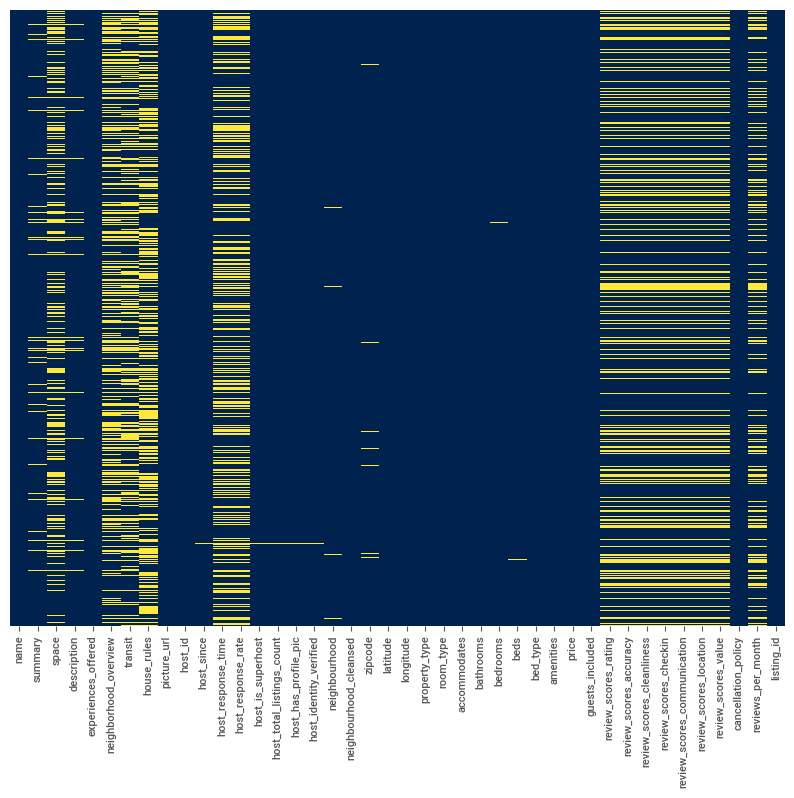

In [43]:
plt.figure(figsize=(10, 8)) # Create a heatmap to visualize the missing data with annotations
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='cividis')

Let's check the missing values ratio of all features from the train_data with the highest missing values at the top and the least missing values at the bottom:

In [892]:
def check_missing_values(df):
    missing_ratio = (df.isnull().sum() / len(df)) * 100 # Calculate the ratio of missing values for each feature
    return missing_ratio.sort_values(ascending=False)

In [893]:
print('Train Dataset Missing Values Ratio:\n', check_missing_values(train_data))

Train Dataset Missing Values Ratio:
 house_rules                    42.287099
transit                        35.827726
neighborhood_overview          35.283265
host_response_time             32.200998
host_response_rate             32.200998
space                          30.535055
review_scores_checkin          24.388612
review_scores_value            24.383185
review_scores_location         24.383185
review_scores_accuracy         24.325302
review_scores_communication    24.321684
review_scores_cleanliness      24.314449
review_scores_rating           24.265610
reviews_per_month              22.393459
summary                         5.343318
description                     3.122061
zipcode                         2.300847
beds                            0.473917
neighbourhood                   0.265900
host_has_profile_pic            0.200781
host_is_superhost               0.200781
host_identity_verified          0.200781
host_total_listings_count       0.200781
host_since          

Now, let's check the test_data:

In [894]:
print('Test Dataset Missing Values Ratio:\n', check_missing_values(test_data))

Test Dataset Missing Values Ratio:
 house_rules                    42.258726
transit                        35.849374
neighborhood_overview          35.442910
host_response_rate             32.154254
host_response_time             32.154254
space                          30.424267
review_scores_value            24.297088
review_scores_location         24.290369
review_scores_checkin          24.287010
review_scores_accuracy         24.250059
review_scores_cleanliness      24.229904
review_scores_communication    24.229904
review_scores_rating           24.186234
reviews_per_month              22.264772
summary                         5.297457
description                     3.167725
zipcode                         2.133091
beds                            0.477006
neighbourhood                   0.288891
host_total_listings_count       0.218348
host_identity_verified          0.218348
host_has_profile_pic            0.218348
host_is_superhost               0.218348
host_since           

## Perform Data Cleaning & Feature Engineering for Numerical Features

Firstly, we start out by cleaning the numerical feature for both train_data and test_data by filling 0's in the missing values

In [895]:
list(train_data.select_dtypes(include=['int64','float64']))

['host_id',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

We include both int64 and float64 values into the newly-created lists called "train_numerical" and "test_numerical". 

In [896]:
numerical_features = ['host_id','host_total_listings_count','latitude','longitude','accommodates','bathrooms','bedrooms','beds',
                            'guests_included','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                            'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month', 'host_response_rate']

In [897]:
train_numerical = train_data[numerical_features].copy()
test_numerical = test_data[numerical_features].copy()

Notice that the feature 'host_response_rate' is represented as a string with a percentage symbol (%). To use it effectively in a machine learning model, we will typically need to convert it to a numerical format. Specifically, we remove the percntage symbol (%), converting the string to a float or integer and dividing by 100 to get a numerical value between 0 and 1.

In [898]:
train_numerical.host_response_rate

0        100%
1        100%
2        100%
3        100%
4        100%
         ... 
55279     NaN
55280     NaN
55281    100%
55282     NaN
55283     90%
Name: host_response_rate, Length: 55284, dtype: object

In [899]:
train_numerical['host_response_rate'] = train_numerical['host_response_rate'].str.rstrip('%').astype(float)/100

In [900]:
test_numerical['host_response_rate'] = test_numerical['host_response_rate'].str.rstrip('%').astype(float)/100

In [901]:
print('Train Numerical Host Response Rate: \n', train_numerical['host_response_rate'])

print('Test Numerical Host Response Rate: \n', test_numerical['host_response_rate'])

Train Numerical Host Response Rate: 
 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
55279    NaN
55280    NaN
55281    1.0
55282    NaN
55283    0.9
Name: host_response_rate, Length: 55284, dtype: float64
Test Numerical Host Response Rate: 
 0         NaN
1        1.00
2         NaN
3         NaN
4        0.00
         ... 
29764    1.00
29765     NaN
29766    0.97
29767     NaN
29768     NaN
Name: host_response_rate, Length: 29769, dtype: float64


In [902]:
train_numerical.fillna(0, inplace = True)
test_numerical.fillna(0, inplace = True)

Now, both datasets' missing values in the numerical features are filled with 0

In [903]:
print('Train Dataset Missing Values Ratio:\n', check_missing_values(train_numerical))

Train Dataset Missing Values Ratio:
 host_id                        0.0
host_total_listings_count      0.0
reviews_per_month              0.0
review_scores_value            0.0
review_scores_location         0.0
review_scores_communication    0.0
review_scores_checkin          0.0
review_scores_cleanliness      0.0
review_scores_accuracy         0.0
review_scores_rating           0.0
guests_included                0.0
beds                           0.0
bedrooms                       0.0
bathrooms                      0.0
accommodates                   0.0
longitude                      0.0
latitude                       0.0
host_response_rate             0.0
dtype: float64


In [904]:
print('Train Dataset Missing Values Ratio:\n', check_missing_values(test_numerical))

Train Dataset Missing Values Ratio:
 host_id                        0.0
host_total_listings_count      0.0
reviews_per_month              0.0
review_scores_value            0.0
review_scores_location         0.0
review_scores_communication    0.0
review_scores_checkin          0.0
review_scores_cleanliness      0.0
review_scores_accuracy         0.0
review_scores_rating           0.0
guests_included                0.0
beds                           0.0
bedrooms                       0.0
bathrooms                      0.0
accommodates                   0.0
longitude                      0.0
latitude                       0.0
host_response_rate             0.0
dtype: float64


Then, we transform 6 review-related features into one brand-new feature called "overall_review"

In [905]:
#transform/merge the review_scores-related features into one feature "overall_review"

review_features = ["review_scores_accuracy", "review_scores_cleanliness",
                   "review_scores_checkin", "review_scores_communication", 
                   "review_scores_location", "review_scores_value"]

train_numerical["overall_review"] = train_numerical[review_features].mean(axis=1)
train_numerical.drop(columns=review_features, inplace=True)

test_numerical["overall_review"] = test_numerical[review_features].mean(axis=1)
test_numerical.drop(columns=review_features, inplace=True)

Our new feature "overall_review" seems identical to the pre-existing feature "review_scoring_rating". To ensure that they carry different values respectively, we examine the likelihood of the feature "review_score_rating" and "overall_reivew".

In [906]:
identical_features = (train_numerical["overall_review"] == train_numerical["review_scores_rating"]).all()

if identical_features:
    print("overall_review and review_scores_rating are identical.")
else:
    print("overall_review and review_scores_rating are not identical.")

overall_review and review_scores_rating are not identical.


In [907]:
# see how much percentage is identical

As the result shows, these two features are not identical. Hence, we keep both of them.

## Perform Data Cleaning & Feature Engineering for Categorical Features

Moving on, we proceed to clean the categorical feature by taking the category with the highest frequency, also known as the mode.

In [908]:
categorical_features = ['experiences_offered', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'room_type', 'bed_type', 'cancellation_policy']

In [909]:
train_categorical = train_data[categorical_features].copy()
test_categorical = test_data[categorical_features].copy()

In [910]:
for feature in categorical_features: # Fill missing values in categorical features with the mode (most frequent value)
    train_mode_value = train_categorical[feature].mode()[0]  # Get the mode value from train_data
    test_mode_value = test_categorical[feature].mode()[0] # Get the mode value from test_data
    train_categorical[feature].fillna(train_mode_value, inplace=True)
    test_categorical[feature].fillna(test_mode_value, inplace=True)

double-check if there is any missing values

In [911]:
train_categorical.isnull().sum()

experiences_offered       0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
room_type                 0
bed_type                  0
cancellation_policy       0
dtype: int64

In [912]:
test_categorical.isnull().sum()

experiences_offered       0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
room_type                 0
bed_type                  0
cancellation_policy       0
dtype: int64

In [913]:
train_categorical.columns

Index(['experiences_offered', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

Next up, we use one-hot encoding to configure the features with high feature important. Here, we aim to configure categorical features with small nunmber of unique/distinct categories to avoid significant increase in the dimensionality

In [914]:
num_unique_categories = train_categorical.apply(lambda col: col.nunique())
print(num_unique_categories)

experiences_offered       5
host_response_time        4
host_is_superhost         2
host_has_profile_pic      2
host_identity_verified    2
room_type                 4
bed_type                  5
cancellation_policy       8
dtype: int64


In [915]:
num_unique_categories = test_categorical.apply(lambda col: col.nunique())
print(num_unique_categories)

experiences_offered       5
host_response_time        4
host_is_superhost         2
host_has_profile_pic      2
host_identity_verified    2
room_type                 4
bed_type                  5
cancellation_policy       6
dtype: int64


We see that features such as "experiences_offered", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "room_type", "bed_type", "cancellation_policy" have smaller amount of unique categorical features (2-6), making them suitable candidates for one-hot encoding. We can use one-hot encoding for these features to create binary columns for each category.

In [916]:
pd.get_dummies(train_categorical, columns=["experiences_offered", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "room_type", "bed_type", "cancellation_policy"])


experiences_offered_business  experiences_offered_family  \
0                                 1                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   
...                             ...                         ...   
55279                             0                           0   
55280                             0                           0   
55281                             0                           0   
55282                             0                           0   
55283                             0                           0   

       experiences_offered_none  experiences_offered_romantic  \
0                             0                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             1                             0   
...                         ...                           ...   
55279                         1                             0   
55280                         1                             0   
55281                         1                             0   
55282                         1                             0   
55283                         1                             0   

       experiences_offered_social  host_response_time_a few days or more  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   
...                           ...                                    ...   
55279                           0                                      0   
55280                           0                                      0   
55281                           0                                      0   
55282                           0                                      0   
55283                           0                                      0   

       host_response_time_within a day  host_response_time_within a few hours  \
0                                    0                                      0   
1                                    0                                      1   
2                                    0                                      0   
3                                    0                                      1   
4                                    0                                      0   
...                                ...                                    ...   
55279                                0                                      0   
55280                                0                                      0   
55281                                0                                      0   
55282                                0                                      0   
55283                                0                                      0   

       host_response_time_within an hour  host_is_superhost_f  ...  \
0                                      1                    0  ...   
1                                      0                    0  ...   
2                                      1                    1  ...   
3                                      0                    1  ...   
4                                      1                    0  ...   
...                                  ...                  ...  ...   
55279                                  1     

In [917]:
train_dummies = pd.get_dummies(train_categorical, columns=["experiences_offered", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "room_type", "bed_type", "cancellation_policy"])
train_categorical = train_dummies

In [918]:
pd.get_dummies(test_categorical, columns=["experiences_offered", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "room_type", "bed_type", "cancellation_policy"])

experiences_offered_business  experiences_offered_family  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   
...                             ...                         ...   
29764                             0                           0   
29765                             0                           0   
29766                             0                           0   
29767                             0                           0   
29768                             0                           0   

       experiences_offered_none  experiences_offered_romantic  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             1                             0   
...                         ...                           ...   
29764                         1                             0   
29765                         1                             0   
29766                         1                             0   
29767                         1                             0   
29768                         1                             0   

       experiences_offered_social  host_response_time_a few days or more  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      1   
...                           ...                                    ...   
29764                           0                                      0   
29765                           0                                      0   
29766                           0                                      0   
29767                           0                                      0   
29768                           0                                      0   

       host_response_time_within a day  host_response_time_within a few hours  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   
...                                ...                                    ...   
29764                                0                                      1   
29765                                0                                      0   
29766                                0                                      0   
29767                                0                                      0   
29768                                0                                      0   

       host_response_time_within an hour  host_is_superhost_f  ...  \
0                                      1                    1  ...   
1                                      1                    0  ...   
2                                      1                    1  ...   
3                                      1                    1  ...   
4                                      0                    1  ...   
...                                  ...                  ...  ...   
29764                                  0     

In [919]:
test_dummies = pd.get_dummies(test_categorical, columns=["experiences_offered", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "room_type", "bed_type", "cancellation_policy"])
test_categorical = test_dummies

In [920]:
train_categorical.columns

Index(['experiences_offered_business', 'experiences_offered_family',
       'experiences_offered_none', 'experiences_offered_romantic',
       'experiences_offered_social', 'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_luxury_moderate',
       'cancellation_policy_luxury_super_strict_95',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_p

In [921]:
test_categorical.columns

Index(['experiences_offered_business', 'experiences_offered_family',
       'experiences_offered_none', 'experiences_offered_romantic',
       'experiences_offered_social', 'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_stri

In [922]:
test_categorical.columns.equals(train_categorical.columns)

False

In [923]:
additional_columns_in_train = train_categorical.columns.difference(test_categorical.columns)
print(additional_columns_in_train)

Index(['cancellation_policy_luxury_moderate', 'cancellation_policy_luxury_super_strict_95'], dtype='object')


It seems like test_categorical features and the train categorical ones do not match. Specifically there are two addtional features called 'cancellation_policy_luxury_moderate', and 'cancellation_policy_luxury_super_strict_95' in train_categorical. This will create problems in applying the prediction model to the test data later on down the road. Let's make sure that they are aligned.

<Axes: >

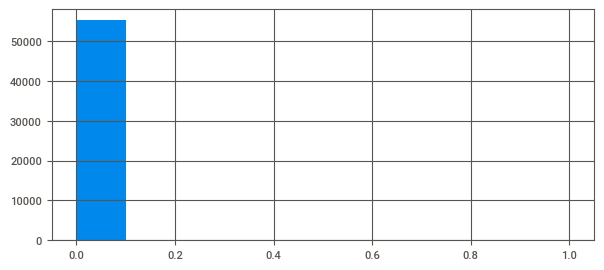

In [924]:
train_categorical.cancellation_policy_luxury_moderate.hist()

<Axes: >

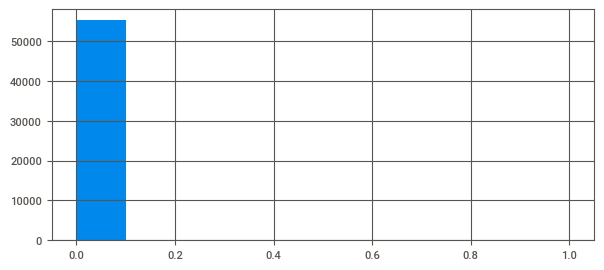

In [925]:
train_categorical.cancellation_policy_luxury_super_strict_95.hist()

These two columns do not seem to contain much information. Therefore, we proceed to drop them

In [926]:
train_categorical = train_categorical.drop(columns=['cancellation_policy_luxury_moderate', 'cancellation_policy_luxury_super_strict_95'])

## Make copies of textual features

Here, we simply make the copies of the textual data for the creation of the preprocessed data as we will concatenate the newly created numerical, categorical and textual data into the new train and test sets called "clean_train" and "clean_test". Moreover, the textual data cleaning will take place before we use it for NN-based Modeling later on.

In [927]:
text_features = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'amenities', 'picture_url', 'zipcode', 'listing_id', 'neighbourhood_cleansed', 'neighbourhood', 'property_type', 'host_since'] 

In [928]:
train_textual = train_data[text_features].copy()
test_textual = test_data[text_features].copy()

Double-check if the textual values are standardized

In [929]:
print(train_textual.head())

                                                name  \
0                   Attic Room in historic Greenwich   
1                Lovely Garden Studio Private Access   
2  Comfi apartment 2 close to wimbledon tennis court   
3           Luxury room in the heart of London - SW4   
4        Excellent city Apartment with Private Patio   

                                             summary  \
0  The room does not have a door but its own disc...   
1  Garden studio with private entrance, 5 minutes...   
2                                                NaN   
3  Luxury first floor Victorian split level maiso...   
4  NEW luxury apartment, with private outside pat...   

                                               space  \
0  Double room available in historic royal Greenw...   
1  Beautiful studio with a king size bed, a sofa ...   
2                                                NaN   
3  Your room will be fully furnished, and it will...   
4  A modern, well-equipped, cosy apartment clo

## Feature Selection

Due to the highly correlated to the feature "neighbourhood_cleansed", we remove the redundant features "longitude" and "latitude" to avoid multicollinearity

First, we cocatenate numerical, categorical and textual features together. 

In [930]:
clean_train = pd.concat([train_numerical, train_categorical, train_textual], axis=1) #concatenate the data
clean_test = pd.concat([test_numerical, test_categorical, test_textual], axis=1)

print("Shape of clean_train:", clean_train.shape) # Print the shape of the new dataset
print("Shape of clean_test:", clean_test.shape)

Shape of clean_train: (55284, 58)
Shape of clean_test: (29769, 58)


In [931]:
redundant_features = ['longitude', 'latitude']
clean_train.drop(redundant_features, axis=1, inplace=True) #remove highly correlated features to avoid multicollinearity 
clean_test.drop(redundant_features, axis=1, inplace=True)

Furthermore, we want to drop irrelevant features that don't contribute to the outcomes of models

In [932]:
clean_train.drop(columns=['picture_url', 'host_id', 'zipcode', 'listing_id', 'host_since'], inplace=True)
clean_test.drop(columns=['picture_url', 'host_id', 'zipcode', 'listing_id', 'host_since'], inplace=True)

Now, both our clean_train dataset and clean_test dataset contain 31 features 

In [933]:
clean_train.shape

(55284, 51)

In [934]:
clean_test.shape

(29769, 51)

## 4. Benchmark Model (for Numerical Features)

Looking into the numerical features in clean_test

In [935]:
list(clean_train.select_dtypes(include=['int64','float64']))

['host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'review_scores_rating',
 'reviews_per_month',
 'host_response_rate',
 'overall_review']

Create train validation split

In [936]:
X = clean_train[['host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','review_scores_rating','reviews_per_month','overall_review', 'host_response_rate']]
print('Numerical Features: ', X.columns)

y = train_data['price']
print('Target: ', y.name)

Numerical Features:  Index(['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'review_scores_rating', 'reviews_per_month',
       'overall_review', 'host_response_rate'],
      dtype='object')
Target:  price


In [937]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
print("Train split size: ", len(X_train), len(y_train))
print("Val split size: ", len(X_val), len(y_val))

Train split size:  44227 44227
Val split size:  11057 11057


## Linear Regression Model for Numerical Features

In [940]:
# Train Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)


# Predict on training set
train_preds = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on valiation set
val_preds = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 63.65
Validation RMSE: 64.12


## Decision Tree Model (for Num)

In [941]:
dt_reg_d2 = DecisionTreeRegressor(max_depth=2)

# Train the decision tree model
dt_reg_d2.fit(X_train, y_train)

# Predict on the training set
train_preds = dt_reg_d2.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = dt_reg_d2.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 66.54
Validation RMSE: 65.64


In [942]:
dt_reg_d5 = DecisionTreeRegressor(max_depth=5)

# Train the decision tree model
dt_reg_d5.fit(X_train, y_train)

# Predict on the training set
train_preds = dt_reg_d5.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = dt_reg_d2.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 60.97
Validation RMSE: 65.64


As training RMSE shows lower number than validation RMSE, it tells us that the results of prediction on training data is relatively more perfect than validation data, signaling overfitting. 

In [943]:
dt_reg_d10 = DecisionTreeRegressor(max_depth=10)

# Train the decision tree model
dt_reg_d10.fit(X_train, y_train)

# Predict on the training set
train_preds = dt_reg_d10.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = dt_reg_d2.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 54.47
Validation RMSE: 65.64


## Random Forests (for Num)

In [944]:
rf_d2 = RandomForestRegressor(max_depth=2, random_state=42)

# Train the random forest model
rf_d2.fit(X_train, y_train)

# Predict on the training set
train_preds = rf_d2.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = rf_d2.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 66.11
Validation RMSE: 65.37


In [955]:
rf_d5 = RandomForestRegressor(max_depth=5, random_state=42)

# Train the random forest model
rf_d5.fit(X_train, y_train)

# Predict on the training set
train_preds = rf_d5.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = rf_d5.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 60.11
Validation RMSE: 60.70


In [945]:
rf_d10 = RandomForestRegressor(max_depth=10, random_state=42)

# Train the random forest model
rf_d10.fit(X_train, y_train)

# Predict on the training set
train_preds = rf_d10.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = rf_d10.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 53.00
Validation RMSE: 57.65


## 5. Models for Non-Textual Features

In [946]:
A = clean_train[['host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','review_scores_rating','reviews_per_month','overall_review','host_response_rate',
                 'experiences_offered_business','experiences_offered_family','experiences_offered_none', 'experiences_offered_romantic', 'experiences_offered_social', 'host_response_time_a few days or more',
                 'host_response_time_within a day','host_response_time_within a few hours','host_response_time_within an hour', 'host_is_superhost_f','host_is_superhost_t', 'host_has_profile_pic_f','host_has_profile_pic_t', 
                 'host_identity_verified_f','host_identity_verified_t', 'room_type_Entire home/apt','room_type_Hotel room', 'room_type_Private room','room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch','bed_type_Futon', 
                 'bed_type_Pull-out Sofa', 'bed_type_Real Bed','cancellation_policy_flexible','cancellation_policy_moderate', 'cancellation_policy_strict','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30',
                 'cancellation_policy_super_strict_60']] #A stands for the non-textual features in clean_train
print('Non-Textual Features: ', A.columns)

b = train_data['price']
print('Target: ', b.name)

Non-Textual Features:  Index(['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'review_scores_rating', 'reviews_per_month',
       'overall_review', 'host_response_rate', 'experiences_offered_business',
       'experiences_offered_family', 'experiences_offered_none',
       'experiences_offered_romantic', 'experiences_offered_social',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_pol

In [947]:
A_train, A_val, b_train, b_val = train_test_split(A,b, test_size=0.2, random_state=42)
print("Train split size: ", len(A_train), len(b_train))
print("Val split size: ", len(A_val), len(b_val))

Train split size:  44227 44227
Val split size:  11057 11057


## Decision Tree (for Non-Text)

In [948]:
dt_reg_d2 = DecisionTreeRegressor(max_depth=2)

# Train the decision tree model
dt_reg_d2.fit(A_train, b_train)

# Predict on the training set
train_preds = dt_reg_d2.predict(A_train)
train_rmse = np.sqrt(mean_squared_error(b_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = dt_reg_d2.predict(A_val)
val_rmse = np.sqrt(mean_squared_error(b_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 64.09
Validation RMSE: 63.31


In [949]:
dt_reg_d5 = DecisionTreeRegressor(max_depth=5)

# Train the decision tree model
dt_reg_d5.fit(A_train, b_train)

# Predict on the training set
train_preds = dt_reg_d5.predict(A_train)
train_rmse = np.sqrt(mean_squared_error(b_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = dt_reg_d5.predict(A_val)
val_rmse = np.sqrt(mean_squared_error(b_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 58.43
Validation RMSE: 59.24


In [950]:
dt_reg_d10 = DecisionTreeRegressor(max_depth=10)

# Train the decision tree model
dt_reg_d10.fit(A_train, b_train)

# Predict on the training set
train_preds = dt_reg_d10.predict(A_train)
train_rmse = np.sqrt(mean_squared_error(b_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = dt_reg_d10.predict(A_val)
val_rmse = np.sqrt(mean_squared_error(b_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 51.64
Validation RMSE: 59.23


## Random Forest (for Non-Text)

In [951]:
rf_d2 = RandomForestRegressor(max_depth=2, random_state=42)

# Train the random forest model
rf_d2.fit(A_train, b_train)

# Predict on the training set
train_preds = rf_d2.predict(A_train)
train_rmse = np.sqrt(mean_squared_error(b_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = rf_d2.predict(A_val)
val_rmse = np.sqrt(mean_squared_error(b_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 63.69
Validation RMSE: 62.90


In [956]:
rf_d5 = RandomForestRegressor(max_depth=5, random_state=42)

# Train the random forest model
rf_d5.fit(A_train, b_train)

# Predict on the training set
train_preds = rf_d5.predict(A_train)
train_rmse = np.sqrt(mean_squared_error(b_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = rf_d5.predict(A_val)
val_rmse = np.sqrt(mean_squared_error(b_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 57.35
Validation RMSE: 58.06


In [952]:
rf_d10 = RandomForestRegressor(max_depth=10, random_state=42)

# Train the random forest model
rf_d10.fit(A_train, b_train)

# Predict on the training set
train_preds = rf_d10.predict(A_train)
train_rmse = np.sqrt(mean_squared_error(b_train, train_preds))

print(f"Training RMSE: {train_rmse:.2f}")

# Evaluate the model on the validation set
val_preds = rf_d10.predict(A_val)
val_rmse = np.sqrt(mean_squared_error(b_val, val_preds))

print(f"Validation RMSE: {val_rmse:.2f}")

Training RMSE: 50.01
Validation RMSE: 55.21


## 6. RNN Models

## Further Preprocess the Textual Data

Given that the textual features do not rigidly follow their topical differentiation (i.e. some content in the 'summary' feature could spill over to 'description' or 'space', and vice versa), Our approach is to combine the text features into one feature for RNN modeling.

In [874]:
clean_text_features = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'amenities','neighbourhood_cleansed', 'neighbourhood', 'property_type']

In [875]:
# Combine text features into one
clean_train['combined_clean_text'] = clean_train[clean_text_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

Then moving on, we preprocess the text data by carry both text standardization and text vectorization.

In [877]:
def text_standardization(text): # Create a standardization function
    
    text = tf.where(tf.strings.regex_full_match(text, ''), 'unknown', text)
    
    lowercase = tf.strings.lower(text) #convert to lowercase
    
    remove_html = tf.strings.regex_replace(lowercase, '<br />', ' ') #remove HTML tags, alternatively remove html
    
    pattern_remove_punctuation = '[%s]' % re.escape(string.punctuation) #pattern to remove punctuation
    
    remove_punct = tf.strings.regex_replace(remove_html, pattern_remove_punctuation, ' ') #apply pattern
    
    remove_double_spaces = tf.strings.regex_replace(remove_punct, '\s+', ' ') #remove double space
    
    return remove_double_spaces

In [878]:
vocab_size = 10000 # Define the size of the vocabulary and the max number of words in a sequence
seq_length = 500 # Define the max number of words in sequence

vectorize_layer = TextVectorization( 
    standardize = text_standardization,
    max_tokens = vocab_size,
    output_sequence_length = seq_length)  # Create a vectorization layer following the function text_standardization 

In [879]:
vocab_size = 10000
seq_length = 500

In [880]:
vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=seq_length,
    standardize=text_standardization
)

In [881]:
vectorize_layer.adapt(clean_train['combined_clean_text'].values)

and then, we create "vectorized_text" to represent our vectorized text features after applying our vectorize_layer to the texts 

In [882]:
vectorized_text = vectorize_layer(clean_train['combined_clean_text'].values)

To ensure that sequences of data, such as the sentences, have the same length, sequence padding could help us define the length of text sequence to better communicate with the machine

In [883]:
max_sequence_length = seq_length # Define the sequence length

# Pad the sequences to have the same length
padded_sequences = pad_sequences(vectorized_text, maxlen=max_sequence_length, padding='post', truncating='post')

## Designing the RNN Model

In [884]:
X = vectorized_text #X stands for the vectorized textual features in clean_train
y = train_data['price']

In [886]:
# First, define hyperparameters
vocab_size = 10000
sequence_length = 500
embedding_dim = 64 

# Then, define a custom RMSE metric function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))


# Design the RNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    tf.keras.layers.LSTM(units=128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Adjust the output layer based on your task
])

# Compile the Model with RMSE as the metric, and set the optimizer Adam's learening rate as default '0.001'
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])

# Model Training with 10 epochs with 64 batch size 
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64)


Epoch 1/10
553/553 [==============================] - 435s 779ms/step - loss: 7801.9521 - rmse: 86.4346 - val_loss: 6991.8120 - val_rmse: 82.5129
Epoch 2/10
553/553 [==============================] - 429s 775ms/step - loss: 6972.9048 - rmse: 82.2714 - val_loss: 6831.1919 - val_rmse: 81.5934
Epoch 3/10
553/553 [==============================] - 420s 760ms/step - loss: 6748.5073 - rmse: 80.9688 - val_loss: 6729.3076 - val_rmse: 80.9364
Epoch 4/10
553/553 [==============================] - 426s 771ms/step - loss: 6468.2808 - rmse: 79.0027 - val_loss: 5832.5391 - val_rmse: 75.1031
Epoch 5/10
553/553 [==============================] - 415s 750ms/step - loss: 5267.6226 - rmse: 71.5111 - val_loss: 5223.5815 - val_rmse: 71.0564
Epoch 6/10
553/553 [==============================] - 413s 748ms/step - loss: 4744.2632 - rmse: 67.7363 - val_loss: 4707.3359 - val_rmse: 67.3689
Epoch 7/10
553/553 [==============================] - 427s 773ms/step - loss: 5019.2832 - rmse: 69.5232 - val_loss: 5300.557

In [887]:
# Evaluate the model on the validation or test data
loss, rmse = model.evaluate(X_val, y_val)
print(f'Validation/Test Loss: {loss}, RMSE: {rmse}')

346/346 [==============================] - 62s 179ms/step - loss: 3756.4192 - rmse: 59.2381
Validation/Test Loss: 3756.419189453125, RMSE: 59.238136291503906


In [ ]:
# Assuming you have test data and it's preprocessed in a similar way
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Evaluate the model on the test data
test_loss, test_rmse = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test RMSE: {test_rmse}')


In [ ]:
# Assuming you have new text data in 'new_text_data' as a NumPy array
new_text_data = preprocess_and_vectorize(new_text_data)  # Preprocess and vectorize the new data similarly to training data

# Convert the new data to a TensorFlow tensor
X_new = tf.convert_to_tensor(new_text_data, dtype=tf.float32)

# Make predictions
predictions = model.predict(X_new)

# Print or use the predictions as needed


## Application of the Test Set

In [888]:
# Combine text features into one in the test data
clean_test['combined_clean_text'] = clean_test[clean_text_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Define a function for text standardization similar to what you did for train data
def text_standardization(text):
    text = tf.where(tf.strings.regex_full_match(text, ''), 'unknown', text)
    lowercase = tf.strings.lower(text)
    remove_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    pattern_remove_punctuation = '[%s]' % re.escape(string.punctuation)
    remove_punct = tf.strings.regex_replace(remove_html, pattern_remove_punctuation, ' ')
    remove_double_spaces = tf.strings.regex_replace(remove_punct, '\s+', ' ')
    return remove_double_spaces

# Use the same TextVectorization layer that you created for the train data
# Assuming you've already defined `vectorize_layer` as mentioned in your train data preprocessing

# Vectorize the test data using the same TextVectorization layer
vectorized_text_test = vectorize_layer(clean_test['combined_clean_text'].values)

# Define the same sequence length as you did for the train data
max_sequence_length = seq_length

# Pad the sequences in the test data to have the same length as the train data
padded_sequences_test = pad_sequences(vectorized_text_test, maxlen=max_sequence_length, padding='post', truncating='post')


In [889]:
# Make predictions using the trained RNN model
predictions = model.predict(padded_sequences_test)

# The 'predictions' variable now contains the predicted prices for the test data

# Assuming you have a DataFrame with the test data (clean_test)
# Add the predicted prices to the DataFrame
clean_test['predicted_price'] = predictions

# Now, your 'clean_test' DataFrame contains both the test data and the corresponding predicted prices

# You can save this DataFrame to a CSV file if needed
clean_test.to_csv('test_predictions.csv', index=False)


931/931 [==============================] - 182s 194ms/step


## 7. Application Results and Conclusion

In this assignment, we embarked on a comprehensive journey to predict property prices for Airbnb listings in London. My approach involved the creation of benchmark models for numerical and non-textual data, as well as the implementation of an RNN model to leverage text features.

The results from our benchmark models revealed interesting findings. Among the numerical features, the Random Forests model stood out with the lowest RMSE (Root Mean Squared Error) of 60.11, showcasing its better predictive performance. Additionally, when incorporating categorical features, the Decision Tree for non-text features exhibited an even lower RMSE of 58.43, emphasizing the importance of holistic feature consideration.

Notably, our RNN model for text features showcased results with an RMSE of 59.2381. This underscores the significance of text data in predicting property prices, highlighting the value of text-based information in this context.

Throughout this assignment, I gained valuable practical coding experience and familiarity with various libraries. It's worth noting that while striving for data perfection during preprocessing is important, it's equally essential to embrace the iterative nature of data science projects. In hindsight, more rapid experimentation with multiple models could have been beneficial, as it provides valuable insights for feature engineering and model refinement.

As a first coding project, the achieved results are commendable for me. Moving forward, it's important to remember to initiate multiple modeling approaches early in the process, as this iterative approach can lead to more robust and insightful outcomes.

In summary, this assignment has equipped us with practical skills and insights into data preprocessing, modeling, and the importance of text data, setting a strong foundation for future data science endeavors.